In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import requests
import json
import nltk
import time
import multiprocessing
import fasttext
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import re
import simplemma
import gensim
import transformers
from transformers import MarianMTModel, MarianTokenizer
from pylab import rcParams
from numpy import mean
from numpy import std
from matplotlib.pyplot import figure
from ordered_set import OrderedSet
from simplemma import text_lemmatizer
from collections import Counter
from scipy.sparse import csr_matrix
from scipy.stats import zscore
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from tensorflow import keras
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from IPython.display import display
from openpyxl import load_workbook
from gensim.utils import simple_preprocess
from matplotlib.colors import LinearSegmentedColormap
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbPip
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.svm import SVC, LinearSVC
from sklearn import decomposition, ensemble
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.optimizers import SGD
from keras import regularizers
from keras import backend as K

C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.4sp5sua7cbgxueoc35yp2asoicyyeqzz.gfortran-win_amd64.dll
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
with open('data/segnalazioni_dataset.json') as f:
  data = json.load(f)

df = pd.DataFrame(data)
display(df)

'''df_target = df[['categoryId', 'categoryName']]
df_target = df_target.sort_values(by=['categoryId']).drop_duplicates()

w_to_excel("categoryFrequencies.xlsx", df_target, 'lista categorie')'''

subject  \
0                             PAVIMENTAZIONE DISSESTATA   
1                                ILLUMINAZIONE PUBBLICA   
2                         CARTELLO SEGNALETICA MANCANTE   
3     eliminazione vegetazione spontanea su marciapi...   
4                          Piazzale pieno di spazzatura   
...                                                 ...   
6060                 diserbo lato carreggiata via Sella   
6061                          Materiale sul marciapiede   
6062  Illuminazione non funzionante salita Tuvio - m...   
6063                                 Sfalcio Via Trasta   
6064                               Erba alta e graffiti   

                                            description  categoryId  \
0     NELLA VIA LUIGI CREMONA LA PAVIMENTAZIONE E' D...         655   
1     VIA DEL PIANELLO -ILLUMINAZIONE PUBBLICA - LA ...        1212   
2     NELLA VIA LUIGI CREMONA LA PAVIMENTAZIONE E' D...         784   
3     si richiede l'eliminazione della vegetazione s...         656   
4     Il piazzale antistante il Santuario della Mado...         648   
...                                                 ...         ...   
6060  in via Sella zona Bavari, le piante ai bordi d...        3493   
6061  Buongiorno, vorrei segnalare la situazione di ...         648   
6062  Vi segnaliamo ANCORA , 4 lampioni di illuminaz...        1212   
6063  Si richiede intervento per eliminare erbacce, ...        3493   
6064  Buongiorno, si invia la segnalazione per salit...        3493   

      parentCategoryId                                       categoryName  \
0                  650                       Manutenzione strade, muretti   
1                  644                             Illuminazione Pubblica   
2                  775  Proposta nuova segnaletica strade secondarie e...   
3                  650  Aree verdi grandi, parchi recintati e ville ch...   
4                  644                       Rifiuti, cassonetti, pulizia   
...                ...                                                ...   
6060               650     Coordinamento verde, diserbi e sfalci stradali   
6061               644                       Rifiuti, cassonetti, pulizia   
6062               644                             Illuminazione Pubblica   
6063               650     Coordinamento verde, diserbi e sfalci stradali   
6064               650     Coordinamento verde, diserbi e sfalci stradali   

     status  
0     close  
1     close  
2     close  
3     close  
4     close  
...     ...  
6060   open  
6061   open  
6062   open  
6063   open  
6064   open  

[6065 rows x 6 columns]

'df_target = df[[\'categoryId\', \'categoryName\']]\ndf_target = df_target.sort_values(by=[\'categoryId\']).drop_duplicates()\n\nw_to_excel("categoryFrequencies.xlsx", df_target, \'lista categorie\')'

In [3]:
df = df[df['status'] == "close"]

In [4]:
df['parentCategoryId'][df['parentCategoryId'] == 0] = df['categoryId']

In [5]:
df['word_count_subject'] = df['subject'].str.split().str.len()
df['word_count_description'] = df['description'].str.split().str.len()
print(df['word_count_subject'].median())
print(df['word_count_description'].median())


4.0
47.0


In [6]:
df_clean['word_count_subject_description'] = df_clean['subject_description'].str.split().str.len()
print(df_clean['word_count_subject_description'].median())

NameError: name 'df_clean' is not defined

In [58]:
tmp = pd.DataFrame(df_clean['categoryName'].value_counts())
for index, item in tmp.iterrows(): 
    for index_clean, item_clean in df_clean.iterrows():
        if(index == item_clean['categoryName']):
            tmp.loc[index, 'categoryId'] = item_clean['categoryId']

In [7]:
tmp = df[['categoryId', 'categoryName']]
tmp = tmp.drop_duplicates()
tmp

categoryId                                       categoryName
0            655                       Manutenzione strade, muretti
1           1212                             Illuminazione Pubblica
2            784  Proposta nuova segnaletica strade secondarie e...
3            656  Aree verdi grandi, parchi recintati e ville ch...
4            648                       Rifiuti, cassonetti, pulizia
...          ...                                                ...
4498         920                              Problematiche per CST
4646        1230             Regolarità Edilizia di una abitazione 
4791         905                               Sostegno all'affitto
4862        1014                                          IMU, TASI
5129         918          Problematiche sociali relativi a disabili

[127 rows x 2 columns]

In [8]:
for index, item in df.iterrows():
    for index_tmp, item_tmp in tmp.iterrows():
        if(item['parentCategoryId'] == item_tmp['categoryId']):
            df.loc[index, 'parentCategoryName'] = item_tmp['categoryName']

df

subject  \
0                             PAVIMENTAZIONE DISSESTATA   
1                                ILLUMINAZIONE PUBBLICA   
2                         CARTELLO SEGNALETICA MANCANTE   
3     eliminazione vegetazione spontanea su marciapi...   
4                          Piazzale pieno di spazzatura   
...                                                 ...   
6022                             Smarrimento portacarte   
6027                    Lavaggio quotidiano marciapiedi   
6034  compattatore plastica Ponte Fleming,media valb...   
6052                           MAZZO DI CHIAVI SMARRITO   
6057                              buco in via archimede   

                                            description  categoryId  \
0     NELLA VIA LUIGI CREMONA LA PAVIMENTAZIONE E' D...         655   
1     VIA DEL PIANELLO -ILLUMINAZIONE PUBBLICA - LA ...        1212   
2     NELLA VIA LUIGI CREMONA LA PAVIMENTAZIONE E' D...         784   
3     si richiede l'eliminazione della vegetazione s...         656   
4     Il piazzale antistante il Santuario della Mado...         648   
...                                                 ...         ...   
6022  Nella tarda serata di domenica 11 luglio ho sm...         679   
6027  Buongiorno,\r\nfaccio seguito alla mia precede...        2803   
6034  Oggi mi sono recato al compattatore di Ponte F...         648   
6052  Buongiorno, in data 01.07.2021 abbiamo smarrit...         679   
6057  Buongiorno,\r\nmi avete mandato la segnalazion...         655   

      parentCategoryId                                       categoryName  \
0                  650                       Manutenzione strade, muretti   
1                  644                             Illuminazione Pubblica   
2                  775  Proposta nuova segnaletica strade secondarie e...   
3                  650  Aree verdi grandi, parchi recintati e ville ch...   
4                  644                       Rifiuti, cassonetti, pulizia   
...                ...                                                ...   
6022               677                                   Oggetti smarriti   
6027               644                                     Pulizia Strade   
6034               644                       Rifiuti, cassonetti, pulizia   
6052               677                                   Oggetti smarriti   
6057               650                       Manutenzione strade, muretti   

     status  word_count_subject  word_count_description   parentCategoryName  
0     close                   2                      38  Facility Management  
1     close                   2                      46             Ambiente  
2     close                   3                      38             Mobilità  
3     close                   7                      29  Facility Management  
4     close                   4                      14             Ambiente  
...     ...                 ...                     ...                  ...  
6022  close                   2                      54       Polizia Locale  
6027  close                   3                      96             Ambiente  
6034  close                   5                      34             Ambiente  
6052  close                   4                      53       Polizia Locale  
6057  close                   4                      24  Facility Management  

[4376 rows x 9 columns]

In [61]:
w_to_excel("categoryFrequencies.xlsx", tmp, "categoryFrequencies_complete")

In [9]:
df_clean = pd.DataFrame({
    "subject_description": df['subject'] + " " + df['description'], 
    "categoryId": df['categoryId'],
    "parentCategoryId": df['parentCategoryId'],
    "categoryName": df['categoryName'],
    "parentCategoryName": df['parentCategoryName'],
    "status": df['status']
})
df_clean

subject_description  categoryId  \
0     PAVIMENTAZIONE DISSESTATA NELLA VIA LUIGI CREM...         655   
1     ILLUMINAZIONE PUBBLICA VIA DEL PIANELLO -ILLUM...        1212   
2     CARTELLO SEGNALETICA MANCANTE NELLA VIA LUIGI ...         784   
3     eliminazione vegetazione spontanea su marciapi...         656   
4     Piazzale pieno di spazzatura Il piazzale antis...         648   
...                                                 ...         ...   
6022  Smarrimento portacarte Nella tarda serata di d...         679   
6027  Lavaggio quotidiano marciapiedi Buongiorno,\r\...        2803   
6034  compattatore plastica Ponte Fleming,media valb...         648   
6052  MAZZO DI CHIAVI SMARRITO Buongiorno, in data 0...         679   
6057  buco in via archimede Buongiorno,\r\nmi avete ...         655   

      parentCategoryId                                       categoryName  \
0                  650                       Manutenzione strade, muretti   
1                  644                             Illuminazione Pubblica   
2                  775  Proposta nuova segnaletica strade secondarie e...   
3                  650  Aree verdi grandi, parchi recintati e ville ch...   
4                  644                       Rifiuti, cassonetti, pulizia   
...                ...                                                ...   
6022               677                                   Oggetti smarriti   
6027               644                                     Pulizia Strade   
6034               644                       Rifiuti, cassonetti, pulizia   
6052               677                                   Oggetti smarriti   
6057               650                       Manutenzione strade, muretti   

       parentCategoryName status  
0     Facility Management  close  
1                Ambiente  close  
2                Mobilità  close  
3     Facility Management  close  
4                Ambiente  close  
...                   ...    ...  
6022       Polizia Locale  close  
6027             Ambiente  close  
6034             Ambiente  close  
6052       Polizia Locale  close  
6057  Facility Management  close  

[4376 rows x 6 columns]

In [37]:
df_clean['subject_description'] = df_clean['subject_description'].apply(clean_document)

In [373]:
df_clean.to_json(r'segnalazioni_dataset_clean.json', orient='records')

In [2]:
#stop_words_set = OrderedSet(stopwords.words('italian'))
stop_words_set = stopwords.words('italian')
stemmer = PorterStemmer()
spell = Speller(lang='it')
langdata = simplemma.load_data('it')
with open('data/ITGivenFemale.json') as f:
  data_female = json.load(f)

with open('data/ITGivenMale.json') as f:
  data_male = json.load(f)



In [3]:
data_names = list()
for i in range(len(data_female)):
     data_names.append(str(data_female[i]['name']))
for i in range(len(data_male)):
     data_names.append(str(data_male[i]['name']))
len(data_names)

9086

In [4]:
for i in range(len(data_names)):
    data_names[i] = data_names[i].lower()
#data_names = OrderedSet(data_names)
len(data_names)

9086

In [5]:
df_cognomi = pd.read_csv('data/cognomi.txt')
df_cognomi['Cognome'] = df_cognomi['Cognome'].str.lower()
#df_cognomi = OrderedSet(df_cognomi['Cognome'])
df_cognomi = list(df_cognomi['Cognome'])

In [6]:
df_comuni = pd.read_csv('data/Elenco-comuni-italiani.csv', sep=';', encoding='latin1')
df_comuni['Denominazione in italiano'] = df_comuni['Denominazione in italiano'].str.lower()
#df_comuni = OrderedSet(df_comuni['Denominazione in italiano'])
df_comuni = list(df_comuni['Denominazione in italiano'])

In [7]:
with open('data/vie_genova.json') as f:
  data_streets = json.load(f)

df_streets = pd.DataFrame(data_streets['Risposta']['Strada'])
df_streets['NOME_VIA'] = df_streets['NOME_VIA'].str.lower()
df_streets = OrderedSet(df_streets['NOME_VIA'])
corpus = ""
for item in df_streets:
    corpus = corpus + " " + item
corpus = OrderedSet(word_tokenize(corpus))
corpus = list(corpus)
df_streets = corpus

In [8]:
def clean_document(document):
    document = re.sub('[^A-Za-z]', ' ', document)
    document = document.lower()
    
    '''
    tokenized_text = OrderedSet(word_tokenize(document))
    tokenized_text -= stop_words_set
    tokenized_text -= data_names
    tokenized_text -= df_comuni
    tokenized_text -= df_cognomi
    tokenized_text -= df_streets
    tokenized_text -= OrderedSet(['copia'])'''

    tokenized_text = word_tokenize(document)
    tokenized_text = [w for w in tokenized_text if not w in stop_words_set]
    tokenized_text = [w for w in tokenized_text if not w in data_names]
    tokenized_text = [w for w in tokenized_text if not w in df_comuni]
    tokenized_text = [w for w in tokenized_text if not w in df_cognomi]
    tokenized_text = [w for w in tokenized_text if not w in df_streets]
    tokenized_text = [w for w in tokenized_text if not w in ['copia']]
    words = []
    for word in tokenized_text:
        tmp = " ".join(text_lemmatizer(word, langdata))
        tmp = stemmer.stem(tmp)
        tmp = stemmer.stem(spell(tmp))
        words.append(tmp)
    
    cleaned_text = " ".join(words)
    document = cleaned_text
    return document

In [8]:
df_clean['parentCategoryId'][df_clean['parentCategoryId'] == 0] = df_clean['categoryId']

<ipython-input-8-1fd7dc9e3a84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['parentCategoryId'][df_clean['parentCategoryId'] == 0] = df_clean['categoryId']


In [40]:
def sub_in_parent(parentCategoryId, index):
    arr_subcategories = df_clean['categoryId'][df_clean['parentCategoryId'] == parentCategoryId].unique()
    arr_sub_in_parent = []
    for item in arr_subcategories:
        if item in np.array(df_clean['parentCategoryId'].unique()):
            if(item != parentCategoryId):
                arr_sub_in_parent.append(item)
    return pd.DataFrame({'parent_category': parentCategoryId, 'subcategory_but_also_parent_cat': [arr_sub_in_parent]}, index=index)

In [41]:
df_subcat_in_parentcat = pd.DataFrame()
index = [-1]
for parent_cat_id in df_clean['parentCategoryId'].unique():
    index[0] += 1
    df_subcat_in_parentcat = df_subcat_in_parentcat.append(sub_in_parent(parent_cat_id, index))
#df_subcat_in_parentcat = df_subcat_in_parentcat[df_subcat_in_parentcat['subcategory_but_also_parent_cat'].map(len) != 0]
'''df_subcat_in_parentcat = df_subcat_in_parentcat.sort_values(by=['parent_category'])
df_subcat_in_parentcat.reindex([list(range(0,len(df_subcat_in_parentcat)))])'''

"df_subcat_in_parentcat = df_subcat_in_parentcat.sort_values(by=['parent_category'])\ndf_subcat_in_parentcat.reindex([list(range(0,len(df_subcat_in_parentcat)))])"

In [43]:
#PUT SUBCATEGORIES THAT ARE ALSO PARENT IN THEIR ORIGINAL PARENT CATEGORY
for index, item in df_subcat_in_parentcat.iterrows():
    for index_clean, item_clean in df_clean.iterrows():
        if item_clean['categoryId'] in item['subcategory_but_also_parent_cat']:
            df_clean.loc[index_clean, 'parentCategoryId'] = item['parent_category']


In [44]:
#FIX THE CATEGORY NAME OF THE SUBCATEGORIES THAT HAVE BEEN PUT IN THEIR ORIGINAL PARENT CATEGORY
tmp = df_clean[['categoryName', 'parentCategoryName', 'parentCategoryId']][(df_clean['parentCategoryId'] == df_clean['categoryId'])].drop_duplicates()
for index, item in tmp.iterrows():
    for index_clean, item_clean in df_clean.iterrows():
        if(item_clean['parentCategoryId'] == item['parentCategoryId']):
            df_clean.loc[index_clean, 'parentCategoryName'] = item['categoryName']

In [45]:
for index, item in df_clean.iterrows():
    for index_tmp, item_tmp in tmp.iterrows():
        if(item['parentCategoryId'] == item_tmp['categoryId']):
            df.loc[index, 'parentCategoryName'] = item_tmp['categoryName']

df_clean

KeyError: 'categoryId'

In [666]:
with open('data/segnalazioni_dataset_clean_close.json') as f:
  data = json.load(f)

df_clean = pd.DataFrame(data)
display(df_clean)

subject_description  categoryId  \
0     pavimentazion dissesto via trarr inizia inizia...         655   
1     illuminazion pubblico via pianello lampada n a...        1212   
2     cartello segnaletica mancar via pavimentazion ...         784   
3     eliminazion vegetazion spontaneo marciapiedi r...         656   
4     piazza pieno spazzatura antistant santuario do...         648   
...                                                 ...         ...   
4371  smarrimento portacarri tardo serata smarrir co...         679   
4372  lavaggio quotidiano marciapiedi seguir preced ...        2803   
4373  compattato plastica flame media valbisagno mun...         648   
4374  chiav smarrir presumibilment ricc portachiavi ...         679   
4375  buca via segnalazion risolto verament sempr mo...         655   

      parentCategoryId                                       categoryName  \
0                  650                       Manutenzione strade, muretti   
1                  644                             Illuminazione Pubblica   
2                  775  Proposta nuova segnaletica strade secondarie e...   
3                  650  Aree verdi grandi, parchi recintati e ville ch...   
4                  644                       Rifiuti, cassonetti, pulizia   
...                ...                                                ...   
4371               677                                   Oggetti smarriti   
4372               644                                     Pulizia Strade   
4373               644                       Rifiuti, cassonetti, pulizia   
4374               677                                   Oggetti smarriti   
4375               650                       Manutenzione strade, muretti   

       parentCategoryName status  
0     Facility Management  close  
1                Ambiente  close  
2                Mobilità  close  
3     Facility Management  close  
4                Ambiente  close  
...                   ...    ...  
4371       Polizia Locale  close  
4372             Ambiente  close  
4373             Ambiente  close  
4374       Polizia Locale  close  
4375  Facility Management  close  

[4376 rows x 6 columns]

In [47]:
df_clean['length'] = df_clean.subject_description.str.split().str.len()
df_clean = df_clean.drop(df_clean[df_clean.length < 2].index)
df_clean = df_clean.drop_duplicates(subset=['subject_description', 'categoryId'])
df_clean

subject_description  categoryId  \
0     pavimentazion dissesto pavimentazion dissesto ...         655   
1     illuminazion pubblico illuminazion pubblico la...        1212   
2     cartello segnaletica mancar pavimentazion diss...         784   
3     eliminazion vegetazion spontaneo marciapiedi r...         656   
4     pieno spazzatura antistant pieno spazzatura ab...         648   
...                                                 ...         ...   
6022  smarrimento portacarri tardo serata smarrir po...         679   
6027  lavaggio quotidiano marciapiedi seguir preced ...        2803   
6034  compattato plastica media valbisagno municipio...         648   
6052  chiav smarrir smarrir presumibilment ricc chia...         679   
6057  buca segnalazion segnalazion risolto verament ...         655   

      parentCategoryId                                       categoryName  \
0                  650                       Manutenzione strade, muretti   
1                  644                             Illuminazione Pubblica   
2                  775  Proposta nuova segnaletica strade secondarie e...   
3                  650  Aree verdi grandi, parchi recintati e ville ch...   
4                  644                       Rifiuti, cassonetti, pulizia   
...                ...                                                ...   
6022               677                                   Oggetti smarriti   
6027               644                                     Pulizia Strade   
6034               644                       Rifiuti, cassonetti, pulizia   
6052               677                                   Oggetti smarriti   
6057               650                       Manutenzione strade, muretti   

       parentCategoryName status  length  
0     Facility Management  close      13  
1                Ambiente  close      19  
2                Mobilità  close      14  
3     Facility Management  close      14  
4                Ambiente  close       8  
...                   ...    ...     ...  
6022       Polizia Locale  close      21  
6027             Ambiente  close      38  
6034             Ambiente  close      20  
6052       Polizia Locale  close      19  
6057  Facility Management  close       9  

[4331 rows x 7 columns]

In [23]:
((df_clean['categoryId'].value_counts())/len(df_clean.index)*100)[:30]

648     18.002780
655     12.859129
1212     9.198332
677      6.209453
2803     5.699722
3493     3.475440
656      3.058387
678      2.734013
2798     2.618165
1266     2.502317
784      2.409639
679      2.363299
692      1.668211
9910     1.413346
650      1.343837
775      1.320667
691      1.274328
680      1.251158
645      1.135310
2800     0.903614
9916     0.857275
9894     0.834106
984      0.741427
783      0.741427
652      0.741427
1794     0.671918
786      0.648749
9926     0.625579
1208     0.602410
8579     0.579240
Name: categoryId, dtype: float64

In [106]:
#len(df_clean['subject_description'].drop_duplicates())
len(df_clean['subject_description'][df_clean['subject_description'].duplicated()].sort_values().unique())

26

In [378]:
print(df_clean['subject_description'].str.split().str.len().median())

22.0


In [379]:
df_clean['parentCategoryName'].value_counts()

Ambiente                                         1575
Facility Management                              1274
Polizia Locale                                    747
Mobilità                                          289
Municipi Manutenzioni                             141
Drenaggi del suolo                                 55
Sistemi Informativi                                51
Politiche dell'Istruzione                          46
Servizi civici                                     34
Commercio                                          25
Municipi Servizi al Cittadino                      21
Urbanistica ed Edilizia Privata                    19
Scelte Strategiche                                 12
Rivi                                               11
Tributi                                            10
Valorizzazione Patrimonio e Demanio Marittimo       8
Politiche Sociali                                   7
Altro                                               1
Spiagge                     

In [544]:
df_clean['parentCategoryId'].value_counts()/len(df_clean.index)*100

650     32.852405
644     31.807629
677     16.882255
775      6.417910
1266     4.941957
981      1.393035
1376     1.011609
1193     0.978441
1268     0.663350
948      0.663350
936      0.414594
1220     0.315091
6141     0.232172
1119     0.232172
1007     0.232172
985      0.199005
1079     0.116086
914      0.116086
1057     0.099502
855      0.082919
858      0.066335
1029     0.066335
1316     0.066335
658      0.049751
903      0.049751
1070     0.016584
988      0.016584
1085     0.016584
Name: parentCategoryId, dtype: float64

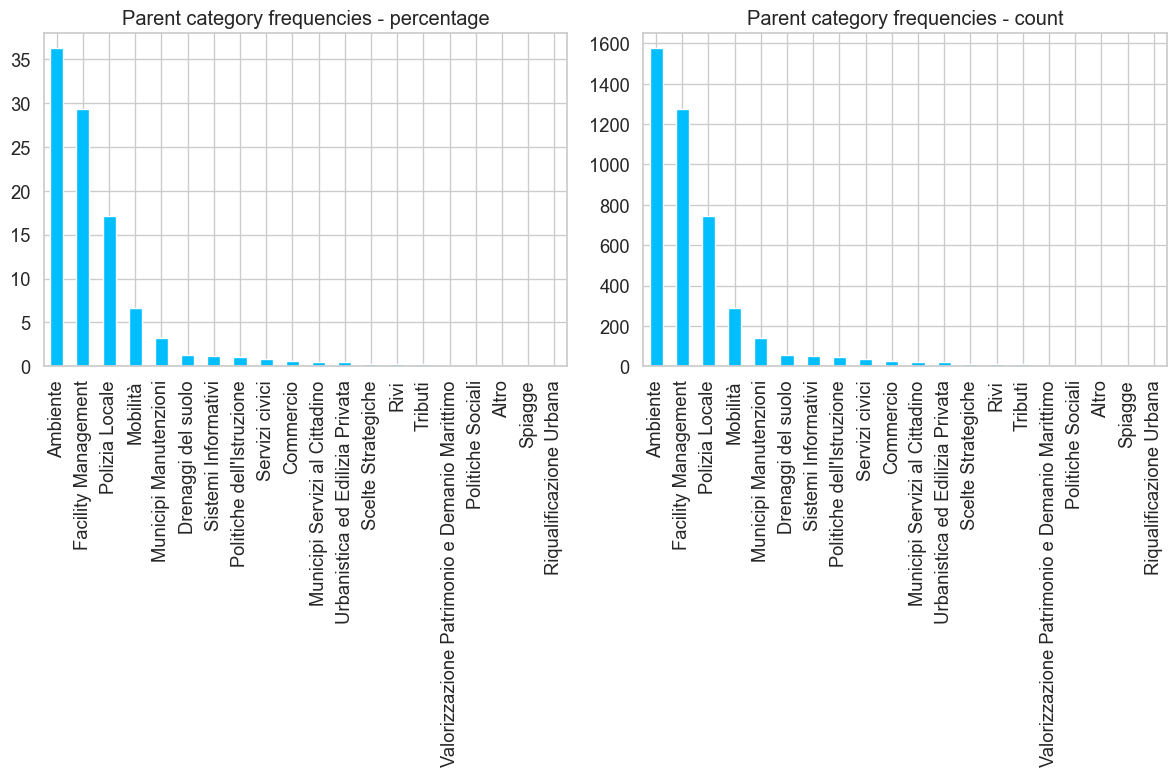

In [560]:
figure(figsize=(12, 8), dpi=100)
plt.subplot(1,2,1)
plt.title('Parent category frequencies - percentage')
((df_clean['parentCategoryName'].value_counts())/len(df_clean.index)*100).plot(kind='bar')
plt.tight_layout()
plt.subplot(1,2,2)
plt.title('Parent category frequencies - count')
(df_clean['parentCategoryName'].value_counts()).plot(kind='bar')
plt.tight_layout()

<AxesSubplot:title={'center':'Subcategory frequencies - count'}>

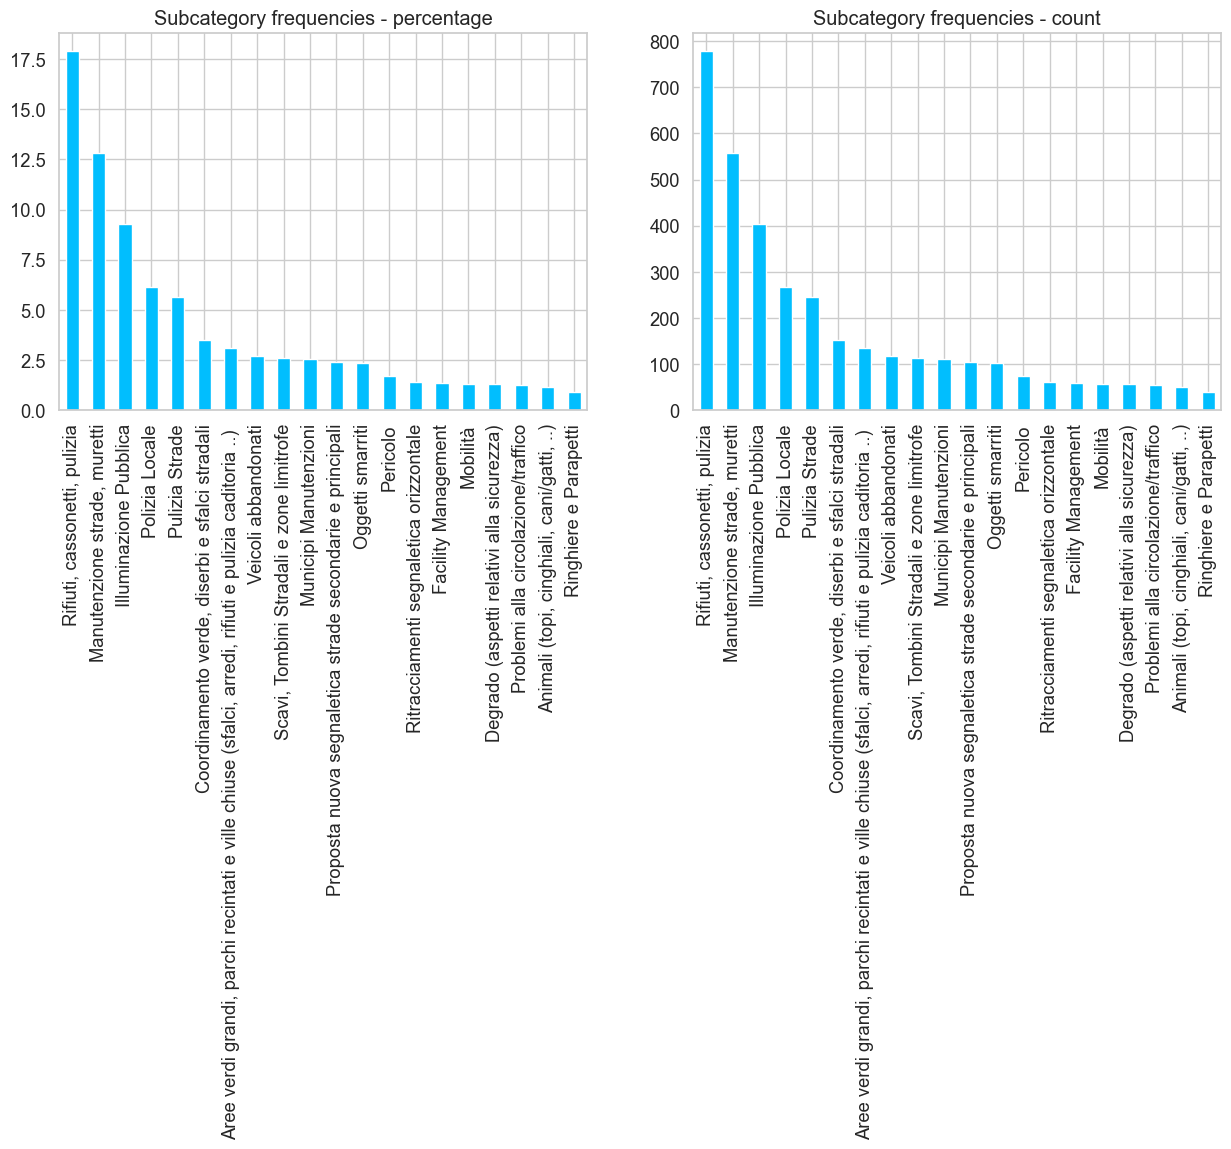

In [561]:
figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)
plt.title('Subcategory frequencies - percentage')
((df_clean['categoryName'].value_counts())/len(df_clean.index)*100)[:20].plot(kind='bar')
plt.subplot(1,2,2)
plt.title('Subcategory frequencies - count')
(df_clean['categoryName'].value_counts())[:20].plot(kind='bar')

In [112]:
figure(figsize=(20, 4), dpi=100)

for index, item in pd.DataFrame({'parentCategoryName': df_clean['parentCategoryName'].unique(), 'parentCategoryId': df_clean['parentCategoryId'].unique()}).iterrows():
    plt.subplot(1, 4, index + 1)
    plt.title("Subcategory Frequencies - " + item['parentCategoryName'])
    plt.ylabel('percentage')
    ((df_clean['categoryName'][df_clean['parentCategoryId'] == item['parentCategoryId']].value_counts())/len(df_clean[df_clean['parentCategoryId'] == item['parentCategoryId']].index)*100).plot(kind='bar')

ValueError: arrays must all be same length

<Figure size 2000x400 with 0 Axes>

ValueError: num must be 1 <= num <= 5, not 6

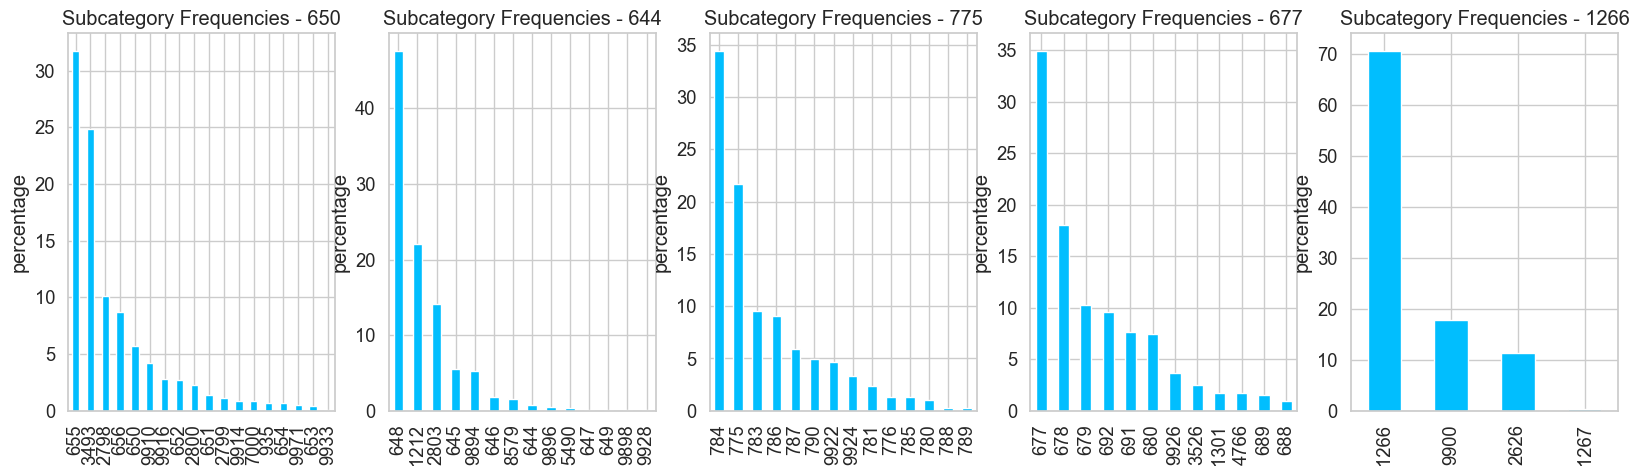

In [113]:
figure(figsize=(20, 5), dpi=100)

for index, item in pd.DataFrame({'parentCategoryId': df_clean['parentCategoryId'].unique()}).iterrows():
    plt.subplot(1, 5, index+1)
    plt.title("Subcategory Frequencies - " + str(item['parentCategoryId']))
    plt.ylabel('percentage')
    ((df_clean['categoryId'][df_clean['parentCategoryId'] == item['parentCategoryId']].value_counts())/len(df_clean[df_clean['parentCategoryId'] == item['parentCategoryId']].index)*100).plot(kind='bar')

In [562]:
df_clean['parentCategoryId'].value_counts()

644     1575
650     1274
677      747
775      289
1266     141
981       55
1376      51
1193      46
948       34
936       25
1268      21
1220      19
6141      12
985       11
1007      10
1119       8
914        7
1057       6
1079       5
858        4
1316       3
1029       1
658        1
1070       1
988        1
903        1
1085       1
Name: parentCategoryId, dtype: int64

In [24]:
df_clean['categoryId'].value_counts()[:30]

648     777
655     555
1212    397
677     268
2803    246
3493    150
656     132
678     118
2798    113
1266    108
784     104
679     102
692      72
9910     61
650      58
775      57
691      55
680      54
645      49
2800     39
9916     37
9894     36
984      32
783      32
652      32
1794     29
786      28
9926     27
1208     26
8579     25
Name: categoryId, dtype: int64

<AxesSubplot:>

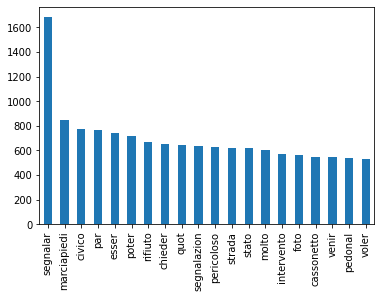

In [48]:
word_frequencies = df_clean['subject_description'].str.split(expand=True).stack().value_counts()
word_frequencies[:20].plot(kind='bar')

In [110]:
w_to_excel("categoryFrequencies.xlsx", pd.DataFrame(word_frequencies), "word_frequencies")

In [9]:
def report(clf, x, y, X_test, y_test, name='classifier', cv=5, dict_scoring=None, fit_params=None):
    if dict_scoring!=None:
        score = dict_scoring.copy() # save the original dictionary
        for i in score.keys():
            if len(set(y))>2:
                if i in ["prec", "recall", "f1-score"]:
                    score[i] = make_scorer(score[i], average = 'weighted') # make each function scorer
                elif i=="roc_auc":
                    score[i] = make_scorer(score[i], average = 'weighted', multi_class="ovo",needs_proba=True) # make each function scorer
                else:
                    score[i] = make_scorer(score[i]) # make each function scorer
                    
            else:
                score[i] = make_scorer(score[i]) # make each function scorer
            
    try:
        scores = cross_validate(clf, x, y, scoring=score,
                         cv=cv, return_train_score=False, n_jobs=-1,  fit_params=fit_params)
    except:
        scores = cross_validate(clf, x, y, scoring=score,
                         cv=cv, return_train_score=False,  fit_params=fit_params)
        
     # Train test on the overall data
    fit_start = time.time()
    _model = clf
    _model.fit(x, y)
        
    fit_end = time.time() - fit_start

    
    score_start = time.time()
    y_pred = _model.predict(X_test)#>0.5).astype(int)
    score_end = time.time() - score_start
    
    '''if save:
        filename= name+".sav"
        pickle.dump(_model, open(os.path.join(root_dir, dir_name,filename), 'wb'))'''
    # initialisation 
    index = []
    value = []
    index.append("Model")
    value.append(name)
    for i in scores:  # loop on each metric generate text and values
        if i == "estimator":
            continue
        for j in enumerate(scores[i]):
            index.append(i+"_cv"+str(j[0]+1))
            value.append(j[1])
        
        
        index.append(i+"_mean")
        value.append(np.mean(scores[i]))
        index.append(i+"_std")
        value.append(np.std(scores[i]))
    
     # add metrics averall dataset on the dictionary 
    
    for i in scores:    # compute metrics 
        if i == "fit_time":
            
            scores[i] = np.append(scores[i] ,fit_end)
            index.append(i.split("test_")[-1]+'_overall')
            value.append(fit_end)
            continue
        if i == "score_time":
            
            scores[i] = np.append(scores[i] ,score_end)
            index.append(i.split("test_")[-1]+'_overall')
            value.append(score_end)
            continue
              
        
        scores[i] = np.append(scores[i] ,score[i.split("test_")[-1]](_model, X_test, y_test))
        index.append(i.split("test_")[-1]+'_overall')
        value.append(scores[i][-1])
    
    return pd.DataFrame(data=value, index=index).T

In [10]:
def cross_validate_NN(model, X, y, X_test, y_test,name="NN", fit_params=None, scoring=None, n_splits=5, batch_size = 32,  use_multiprocessing=True):
    '''
    Function create a metric report automatically with cross_validate function.
    @param model: (model) neural network model
    @param X: (list or matrix or tensor) training X data
    @param y: (list) label data 
    @param X_test: (list or matrix or tensor) testing X data
    @param y_test: (list) label test data 
    @param name: (string) name of the model (default classifier)
    @param fit_aparams: (dict) add parameters for model fitting 
    @param scoring: (dict) dictionary of metrics and names
    @param n_splits: (int) number of fold for cross-validation (default 5)
    @return: (pandas.dataframe) dataframe containing all the results of the metrics 
    for each fold and the mean and std for each of them
    '''
    # ---- Parameters initialisation
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='auto', patience=3)
    seed = 42
    k = 1
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    
    # Creation of list for each metric
    if scoring==None:        # create a dictionary if none is passed
        dic_scoring = {}
    if scoring!=None:        # save the dict 
        dic_score = scoring.copy()
    
    dic_score["fit_time"] = None   # initialisation for time fitting and scoring
    dic_score["score_time"] = None
    scorer = {}
    for i in dic_score.keys(): 
        scorer[i] = []
    
    index = ["Model"]
    results = [name]
    # ---- Loop on k-fold for cross-valisation
    for train, test in kfold.split(X, y):   # training NN on each fold 
        # create model
        print(f"k-fold : {k}")
        fit_start = time.time()
        _model = tf.keras.models.clone_model(model)
        if len(np.unique(y))==2: # binary
            _model.compile(optimizer='adam',
                  loss=tf.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
        else:  # multiclass 
            _model.compile(optimizer='adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
        _model.fit(X[train], y[train],
                        epochs=50, callbacks=[es], validation_data=(X[test], y[test]),
                         verbose=False, batch_size = batch_size,  use_multiprocessing=use_multiprocessing)
        
        fit_end = time.time() - fit_start

        score_start = time.time()
        y_pred = (_model.predict(X[test])>0.5).astype(int)
        score_end = time.time() - score_start
        #if len(set(y))>2:
        #    y_pred =np.argmax(y_pred,axis=1)
        #print(y_test[0], y_pred[0])
        if len(set(y))==2:
            print(f"Precision: {round(100*precision_score(y[test], y_pred), 3)}% , Recall: {round(100*recall_score(y[test], y_pred), 3)}%, Time \t {round(fit_end, 4)} ms")
        else: 
            print(f"Precision: {round(100*precision_score(y[test], np.argmax(y_pred,axis=1), average='weighted'), 3)}% , Recall: \
        {round(100*recall_score(y[test], np.argmax(y_pred,axis=1), average='weighted'), 3)}%, Time \t {round(fit_end, 4)} ms")
        
        
        # ---- save each metric
        for i in dic_score.keys():    # compute metrics 
            if i == "fit_time":
                scorer[i].append(fit_end)
                index.append(i+'_cv'+str(k))
                results.append(fit_end)
                continue
            if i == "score_time":
                scorer[i].append(score_end)
                index.append(i+'_cv'+str(k))
                results.append(score_end)
                continue
            
            if len(set(y))>2:
                if i in ["prec", "recall", "f1-score"]:
                    scorer[i].append(dic_score[i](y[test], np.argmax(y_pred,axis=1), average = 'weighted')) # make each function scorer

                elif i=="roc_auc":
                    scorer[i].append(dic_score[i](to_categorical(y[test]), y_pred, average = 'macro', multi_class="ovo")) # make each function scorer
                else:
                    scorer[i].append(dic_score[i]( y[test], np.argmax(y_pred,axis=1))) # make each function scorer

            else:
                scorer[i].append(dic_score[i]( y[test], y_pred)) # make each function scorer
            #scorer[i].append(dic_score[i]( y[test], y_pred))
            index.append("test_"+i+'_cv'+str(k))
            results.append(scorer[i][-1])
        K.clear_session()
        del _model
        k+=1
    
    # Train test on the overall data
    print("Overall train-test data")
    fit_start = time.time()
    _model =  tf.keras.models.clone_model(model)
    if len(np.unique(y))==2: # binary
        _model.compile(optimizer='adam',
                  loss=tf.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    else:  # multiclass 
        _model.compile(optimizer='adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
        _model.fit(X[train], y[train],
                        epochs=50, callbacks=[es], validation_data=(X[test], y[test]),
                         verbose=False)
    '''if save:
        check_p = tf.keras.callbacks.ModelCheckpoint(os.path.join(root_dir, dir_name, name+".h5"), save_best_only=True)
        _model.fit(X, y,epochs=1000, callbacks=[es, check_p], validation_split=0.2, batch_size = batch_size, 
                   verbose=False, use_multiprocessing=use_multiprocessing)
        
    else:'''
    _model.fit(X, y,epochs=50, callbacks=[es],  validation_split=0.2, batch_size = batch_size, 
                   verbose=False, use_multiprocessing=use_multiprocessing)
        
    fit_end = time.time() - fit_start

    #_acc = _model.evaluate(X_test, y_test, verbose=0)

    score_start = time.time()
    y_pred = (_model.predict(X_test)>0.5).astype(int)
    score_end = time.time() - score_start
    #if len(set(y))>2:
    #    y_pred =np.argmax(y_pred,axis=1)
    if len(set(y))==2:
        print(f"Precision: {round(100*precision_score(y_test, y_pred, labels=np.unique(y_pred)), 3)}% , Recall: {round(100*recall_score(y_test, y_pred), 3)}%, Time \t {round(fit_end, 4)} ms")
    else: 
        print(f"Precision: {round(100*precision_score(y_test, np.argmax(y_pred,axis=1), average='weighted'), 3)}% , Recall: \
        {round(100*recall_score(y_test, np.argmax(y_pred,axis=1), average='weighted'), 3)}%, Time \t {round(fit_end, 4)} ms")

    # Compute mean and std for each metric
    for i in scorer: 
        
        results.append(np.mean(scorer[i]))
        results.append(np.std(scorer[i]))
        if i == "fit_time":
            index.append(i+"_mean")
            index.append(i+"_std")
            continue
        if i == "score_time":
            index.append(i+"_mean")
            index.append(i+"_std")
            continue
        
        index.append("test_"+i+"_mean")
        index.append("test_"+i+"_std")
    # add metrics averall dataset on the dictionary 
    for i in dic_score.keys():    # compute metrics 
        if i == "fit_time":
            scorer[i].append(fit_end)
            index.append(i+'_overall')
            results.append(fit_end)
            continue
        if i == "score_time":
            scorer[i].append(score_end)
            index.append(i+'_overall')
            results.append(score_end)
            continue
        
        if len(set(y))>2:
            if i in ["prec", "recall", "f1-score"]:
                scorer[i].append(dic_score[i](y_test, np.argmax(y_pred,axis=1), average = 'weighted')) # make each function scorer

            elif i=="roc_auc":
                scorer[i].append(dic_score[i](to_categorical(y_test), y_pred, average = 'weighted', multi_class="ovo")) # make each function scorer
            else:
                scorer[i].append(dic_score[i]( y_test, np.argmax(y_pred,axis=1))) # make each function scorer

        else:
            #scorer[i].append(dic_score[i]( y[test], y_pred))                             
            scorer[i].append(dic_score[i](_model, X_test, y_test))
        index.append(i+'_overall')
        results.append(scorer[i][-1])
    
            
    return pd.DataFrame(results, index=index).T

In [11]:
def w_to_excel(path, df, sheet_name):
    book = load_workbook(path)
    writer = pd.ExcelWriter(path, engine = 'openpyxl')
    writer.book = book

    df.to_excel(writer, sheet_name = sheet_name)
    writer.save()
    writer.close()

In [740]:
subcategories = np.array([])
for item in df_clean.parentCategoryId.unique():
    if item in X.parentCategoryId.unique():
        subcategories = np.append(subcategories,({
            str(item) : list(X['categoryId'][X['parentCategoryId'] == item].unique())
        }))
subcategories

array([{'650': [655, 656, 650, 3493, 2798]},
       {'644': [1212, 648, 2803, 645, 9894]}, {'775': [784, 775]},
       {'677': [692, 678, 677, 679]}, {'1266': [1266]}], dtype=object)

In [558]:
df_clean[['categoryId', 'parentCategoryId', 'categoryName', 'parentCategoryName']][df_clean[['categoryId']].replace(df_clean[['categoryId']].apply(pd.Series.value_counts)).gt(70).all(1)].drop_duplicates()

categoryId  parentCategoryId  \
0            655               650   
1           1212               644   
2            784               775   
3            656               650   
4            648               644   
6            656               650   
7            692               677   
9            655               650   
12          1266              1266   
28           775               775   
41           678               677   
42          2803               644   
49           784               775   
89           677               677   
123          650               650   
238          645               644   
316         3493               650   
402         2798               650   
960          679               677   
1906        9894               644   

                                           categoryName     parentCategoryName  
0                          Manutenzione strade, muretti    Facility Management  
1                                Illuminazione Pubblica               Ambiente  
2     Proposta nuova segnaletica strade secondarie e...               Mobilità  
3     Aree verdi grandi, parchi recintati e ville ch...    Facility Management  
4                          Rifiuti, cassonetti, pulizia               Ambiente  
6                                        Verde pubblico    Facility Management  
7                                              Pericolo         Polizia Locale  
9                                   Manutenzione strade    Facility Management  
12                                Municipi Manutenzioni  Municipi Manutenzioni  
28                                             Mobilità               Mobilità  
41                                  Veicoli abbandonati         Polizia Locale  
42                                       Pulizia Strade               Ambiente  
49                                 Segnaletica stradale               Mobilità  
89                                       Polizia Locale         Polizia Locale  
123                                 Facility Management    Facility Management  
238           Animali (topi, cinghiali, cani/gatti, ..)               Ambiente  
316      Coordinamento verde, diserbi e sfalci stradali    Facility Management  
402            Scavi, Tombini Stradali e zone limitrofe    Facility Management  
960                                    Oggetti smarriti         Polizia Locale  
1906             Alberi su tutto il territorio comunale               Ambiente

In [49]:
df_clean['categoryId'].value_counts()[:30]

648     777
655     555
1212    400
677     268
2803    246
3493    150
656     134
678     118
2798    113
1266    110
784     104
679     102
692      74
9910     61
650      58
775      57
680      55
691      55
645      49
2800     39
9916     37
9894     36
652      33
984      32
783      32
786      30
1794     29
9926     27
1208     26
8579     25
Name: categoryId, dtype: int64

In [51]:
y.value_counts()

648     777
655     555
1212    400
2803    246
3493    150
656     134
678     118
2798    113
784     104
679     102
9910     61
680      55
691      55
645      49
2800     39
9916     37
9894     36
652      33
984      32
783      32
786      30
1794     29
Name: categoryId, dtype: int64

In [50]:
X = df_clean[['subject_description', 'categoryId', 'parentCategoryId']]
X = X[X[['categoryId']].replace(X[['categoryId']].apply(pd.Series.value_counts)).gt(27).all(1)]
#X = X[X[['categoryId ']].replace(X[['categoryId']].apply(pd.Series.value_counts)).gt(36).all(1)]
X = X[~X['categoryId'].isin([650, 775, 677, 1266, 692])]
y = X['categoryId']
#X = X[['subject_description']]

In [567]:
X = df_clean[['subject_description', 'categoryId', 'parentCategoryId']]
#X = X[X[['categoryId']].replace(X[['categoryId']].apply(pd.Series.value_counts)).gt(28).all(1)]
X = X[X[['parentCategoryId']].replace(X[['parentCategoryId']].apply(pd.Series.value_counts)).gt(140).all(1)]
y = X['parentCategoryId']
#X = X[['subject_description']]

C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'category frequency')

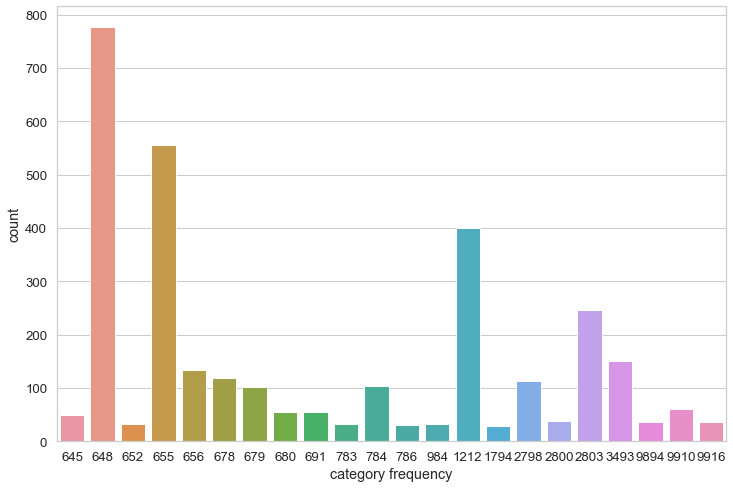

In [52]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
sns.countplot(pd.DataFrame(y).categoryId)
plt.xlabel('category frequency')

In [342]:
y = pd.DataFrame(y)
y = y['categoryId'].apply(lambda x: -1 if x in [650, 677, 775] else x)

In [344]:
from sklearn.semi_supervised import LabelPropagation

tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.5, max_features=None, ngram_range=(1,1), norm='l2', use_idf=True)
X_temp = tfidf_vectorizer.fit_transform(X['subject_description'])

lp = LabelPropagation(kernel='knn')
lp.fit(X_temp.toarray(), y) 
y = lp.transduction_

In [536]:
pd.DataFrame(y).value_counts()

parentCategoryId
650                 1847
644                 1814
677                  931
1266                 263
775                  254
981                   40
dtype: int64

In [54]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# FEATURE EXTRACTION

In [55]:
#TFIDF VECTORIZER
df_tfidf = pd.DataFrame()
#df_tfidf['subject_description'] = df_clean['subject_description']
df_tfidf['subject_description'] = X_train['subject_description']

tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.75, max_features=None, ngram_range=(1,2), norm='l2', use_idf=True)

X_train = tfidf_vectorizer.fit_transform(df_tfidf['subject_description'])
'''X_train = pd.DataFrame(
    features_train.todense(),
    columns=tfidf_vectorizer.get_feature_names()
)'''

x_test = tfidf_vectorizer.transform(x_test['subject_description'])
'''x_test = pd.DataFrame(
    features_test.todense(),
    columns=tfidf_vectorizer.get_feature_names()
)'''

#y = df_clean['categoryId']
#y = y['categoryId']
Y_train = Y_train.to_frame()
y_test = y_test.to_frame()

In [262]:
word2vec_path = "itwiki_20180420_300d.txt"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=False)

In [263]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['subject_description'].apply(lambda x: get_average_word2vec(word_tokenize(x), vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [275]:
embeddings = get_word2vec_embeddings(word2vec, X)

In [268]:
X_train, x_test, Y_train, y_test = train_test_split(embeddings, y, test_size=0.3, random_state=40, stratify=y)

In [12]:
def concatenate_csc_matrices_by_columns(matrix1, matrix2):
    new_data = np.concatenate((matrix1.data, matrix2.data))
    new_indices = np.concatenate((matrix1.indices, matrix2.indices))
    new_ind_ptr = matrix2.indptr + len(matrix1.data)
    new_ind_ptr = new_ind_ptr[1:]
    new_ind_ptr = np.concatenate((matrix1.indptr, new_ind_ptr))

    return csr_matrix((new_data, new_indices, new_ind_ptr))

In [1207]:
X = concatenate_csc_matrices_by_columns(X_train, x_test)
y = pd.concat([Y_train, y_test])

# FEATURE ENGINEERING

In [46]:
#REMOVE CONSTANT FEATURES
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(X_train)
feature_list = X_train[X_train.columns[
    constant_filter.get_support(indices=True)]]

print('Number of selected features: ' ,len(list(feature_list)),'\n')
print('List of selected features: \n' ,list(feature_list))

Number of selected features:  880 

List of selected features: 
 ['abbandonar', 'abbandonato', 'abbandono', 'abita', 'abitanti', 'abitazioni', 'abusivo', 'accanto', 'accatastar', 'acced', 'accend', 'acceso', 'accesso', 'accumular', 'addetto', 'addirittura', 'adiacenti', 'adibir', 'aereo', 'affinch', 'aggiung', 'aggiunto', 'aiuola', 'albaro', 'alcun', 'alcuno', 'allagamento', 'allagar', 'allegato', 'allegra', 'almeno', 'alto', 'altr', 'altro', 'ami', 'amministr', 'amministrazion', 'andar', 'andreoli', 'angolar', 'anim', 'anno', 'anticipa', 'anticipatament', 'antico', 'anziana', 'anziano', 'aperto', 'apertura', 'app', 'appartamento', 'appena', 'appoggiar', 'apposito', 'appunta', 'aprir', 'area', 'arrivar', 'asfalta', 'asilo', 'aspettar', 'assembramento', 'assenti', 'assolutament', 'attenda', 'attenzion', 'atteso', 'attivit', 'attorno', 'attraversa', 'attraversamento', 'attualment', 'aumentar', 'auto', 'autobu', 'automobil', 'automobilista', 'aver', 'avvenir', 'avvisar', 'azienda', 'azion

In [47]:
X_train = constant_filter.transform(X_train)
x_test = constant_filter.transform(x_test)
X_train.shape, x_test.shape

((1033, 880), (444, 880))

In [48]:
X_train = pd.DataFrame(X_train)
x_test = pd.DataFrame(x_test)

In [242]:
#REMOVE CORRELATED FEATURES
def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col

In [50]:
corr_features = get_correlation(X_train, 0.70)

In [51]:
X_train = X_train.drop(labels=corr_features, axis=1)
x_test = x_test.drop(labels=corr_features, axis=1)
X_train = pd.DataFrame(X_train)
x_test = pd.DataFrame(x_test)
X_train.shape, x_test.shape

((1033, 872), (444, 872))

In [56]:
#LABEL ENCODING 
label_encoder = preprocessing.LabelEncoder()
Y_train = label_encoder.fit_transform(np.ravel(Y_train, order='C'))
y_test = label_encoder.transform(np.ravel(y_test, order='C'))

'''onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
Y_train = onehot_encoder.fit_transform(Y_train.reshape(len(Y_train), 1))
y_test = onehot_encoder.transform(y_test.reshape(len(y_test), 1))'''

'onehot_encoder = preprocessing.OneHotEncoder(sparse=False)\nY_train = onehot_encoder.fit_transform(Y_train.reshape(len(Y_train), 1))\ny_test = onehot_encoder.transform(y_test.reshape(len(y_test), 1))'

In [546]:
#DATA SCALING - OPTION 1 - STANDARD
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

In [592]:
#DATA SCALING - OPTION 2 - MINMAX
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

In [55]:
def plot2D_dim_reduction(X, Y, technique):
    fig = plt.figure(figsize=(8, 8))  
    plt.xlabel(technique + '1')
    plt.ylabel(technique + '2')
    plt.scatter(X[:, 1], X[:, 2],  c=Y, cmap='rainbow', alpha=0.7, edgecolors='b')

In [12]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
def plot3D_dim_reduction(X_train, Y_train, technique):
    fig = plt.figure(figsize=(10,10))
    
    # choose projection 3d for creating a 3d graph
    axis = fig.add_subplot(111, projection='3d')
    
    axis.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=Y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
    axis.set_xlabel(technique + '1', fontsize=10)
    axis.set_ylabel(technique + '2', fontsize=10)
    axis.set_zlabel(technique + '3', fontsize=10)

In [53]:
#LINEAR DISCRIMINANT ANALYSIS
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train, Y_train)
x_test = lda.transform(x_test)

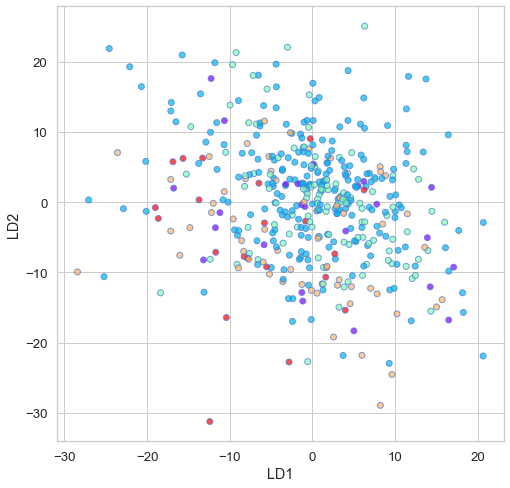

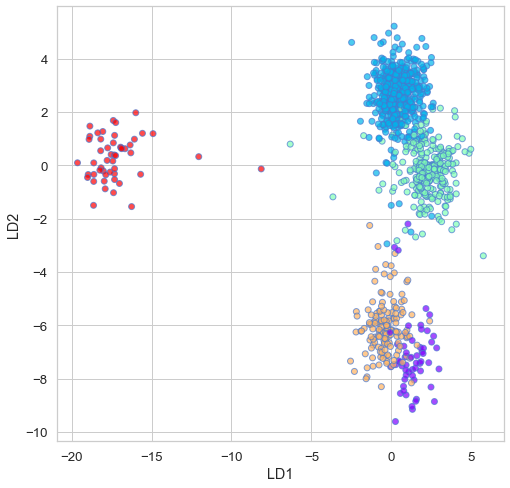

In [56]:
plot2D_dim_reduction(x_test, y_test, 'LD')
plot2D_dim_reduction(X_train, Y_train, 'LD')
#plot3D_dim_reduction(X_train, Y_train, 'LD')

In [138]:
#PRINCIPAL COMPONENTS ANALYSIS
pca = PCA()
X_train = pca.fit_transform(X_train, Y_train)
x_test = pca.transform(x_test)

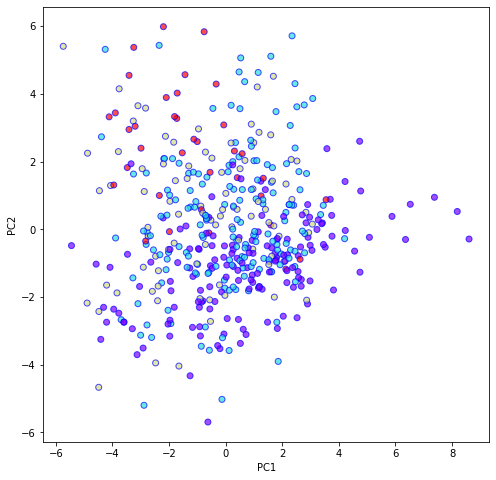

In [140]:
plot2D_dim_reduction(x_test, y_test, 'PC')
#plot3D_dim_reduction(X_train, Y_train, 'PC')

# OVERSAMPLING

In [139]:
#RANDOM OVERSAMPLER
ros = RandomOverSampler(random_state=777)
#X_ROS, y_ROS = ros.fit_resample(X, y)
X_train, Y_train = ros.fit_resample(X_train, Y_train)
x_test, y_test = ros.fit_resample(x_test, y_test)
#X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)

In [59]:
#SMOTE
'''for i in range(len(pd.DataFrame(Y_train).value_counts())):
    k_neighbors=int(np.sqrt(list(pd.DataFrame(Y_train).value_counts())[len(list(pd.DataFrame(Y_train).value_counts()))-1]))
    print(k_neighbors)
    smote = SMOTE(random_state=777, k_neighbors=k_neighbors, sampling_strategy='minority')
    #smote = SMOTE(random_state=777, k_neighbors=4)
    X_train, Y_train = smote.fit_resample(X_train, Y_train)'''

smote = SMOTE()
#smote = SMOTE(random_state=777, k_neighbors=4)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [59]:
pd.DataFrame(Y_train).value_counts()

0     544
10    544
20    544
19    544
18    544
17    544
16    544
15    544
14    544
12    544
11    544
9     544
8     544
7     544
6     544
5     544
4     544
2     544
21    544
13    542
3     540
1     538
dtype: int64

In [58]:
smotetomek = SMOTETomek(random_state=42)
X_train, Y_train = smotetomek.fit_resample(X_train, Y_train)

In [757]:
for item in subcategories:
    for parent, children in item.items():
        Y_train['categoryId'] = Y_train['categoryId'].apply(lambda x: parent if x in children else x)
        y_test['categoryId'] = y_test['categoryId'].apply(lambda x: parent if x in children else x)
Y_train

categoryId
0           650
1           644
2           644
3           677
4           677
...         ...
8597        650
8598        650
8599        650
8600        650
8601        650

[8602 rows x 1 columns]

In [1923]:
#BORDERLINE-SMOTE - VARIANT 1
bsmote1 = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train, Y_train = bsmote1.fit_resample(X_train, Y_train)
x_test, y_test = bsmote1.fit_resample(x_test, y_test)

In [1937]:
#BORDERLINE-SMOTE - VARIANT 2
bsmote2 = BorderlineSMOTE(random_state = 101, kind = 'borderline-2')
X_train, Y_train = bsmote2.fit_resample(X_train, Y_train)
x_test, y_test = bsmote2.fit_resample(x_test, y_test)

In [568]:
#SVM SMOTE
for i in range(len(pd.DataFrame(Y_train).value_counts())):
    k_neighbors=int(np.sqrt(list(pd.DataFrame(Y_train).value_counts())[len(list(pd.DataFrame(Y_train).value_counts()))-1]))
    print(k_neighbors)
    smote = SVMSMOTE(random_state=777, k_neighbors=k_neighbors, sampling_strategy='minority')
    #smote = SMOTE(random_state=777, k_neighbors=4)
    X_train, Y_train = smote.fit_resample(X_train, Y_train)

24
32
32


In [671]:
#ADASYN
adasyn = ADASYN(random_state = 101, sampling_strategy='minority')
X_train, Y_train = adasyn.fit_resample(X_train, Y_train)
#x_test, y_test = adasyn.fit_resample(x_test, y_test)

In [243]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [244]:
score_metrics = {'acc': accuracy_score,
               'balanced_accuracy': balanced_accuracy_score,
               'prec': precision_score,
               'recall': recall_score,
               'f1-score': f1_score,
               'tp': tp, 'tn': tn,
               'fp': fp, 'fn': fn,
               'cohens_kappa':cohen_kappa_score,
               'matthews_corrcoef':matthews_corrcoef,
               "roc_auc":roc_auc_score}
CV_splits = 5

In [60]:
def get_train_test_error(model, X, y):
    kf = KFold(n_splits=10)
    list_training_error = []
    list_testing_error = []
    for train_index, test_index in tqdm(kf.split(X)):
        X_train, x_test = X[train_index], X[test_index]
        Y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, np.ravel(Y_train, order='C'))
        Y_train_data_pred = model.predict(X_train)
        y_test_data_pred = model.predict(x_test)
        fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
        fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
        list_training_error.append(fold_training_error)
        list_testing_error.append(fold_testing_error)
    return kf, list_training_error, list_testing_error

In [61]:
def plot_train_test_error(kf, list_training_error, list_testing_error, combination):
    plt.subplot(1,2,1)
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='train')
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='test')
    plt.xlabel('number of fold')
    plt.ylabel(combination)
    plt.title('Training-testing error across folds')
    plt.legend()

    '''plt.tight_layout()
    plt.subplot(1,2,2)
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='test')
    plt.xlabel('number of fold')
    plt.ylabel('testing error')
    plt.title('Testing error across folds')
    plt.tight_layout()'''
    
    plt.show()

In [62]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=3)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['green','red', 'blue', 'orange', 'black']
        #colors = ['green','red','blue', 'black']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            green_patch = mpatches.Patch(color='green', label='Ambiente')
            red_patch = mpatches.Patch(color='red', label='Facility Management')
            blue_patch = mpatches.Patch(color='blue', label='Polizia Locale')
            orange_patch = mpatches.Patch(color='orange', label='Mobilità')
            black_patch = mpatches.Patch(color='black', label='Manutanzione Municipi')
            '''
            green_patch = mpatches.Patch(color='green', label='')
            red_patch = mpatches.Patch(color='red', label='')
            blue_patch = mpatches.Patch(color='blue', label='')
            black_patch = mpatches.Patch(color='black', label='')'''
            plt.legend(handles=[green_patch, red_patch, blue_patch, orange_patch, black_patch], prop={'size': 15})

In [63]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="black" if cm[i, j] < thresh else "white", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [64]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [65]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

# HYPERPARAMETER TUNING

In [1190]:
#HYPERPARAMETER OPTIMIZATION WITH RANDOMSEARCHCV - RANDOM FOREST CLASSIFIER
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'tfidf__max_df': np.linspace(0.7, 1, 4),
               'tfidf__max_features': (None, 1000, 3000, 5000),
               'tfidf__ngram_range': ((1, 1), (1, 2)),
               'tfidf__use_idf': (True, False),
               'tfidf__norm': ('l1', 'l2'),
               'sampling__k_neighbors': [int(np.sqrt(list(df_clean['parentCategoryId'].value_counts())[len(list(df_clean['parentCategoryId'].value_counts()))-1]))],
               'clf__n_estimators': n_estimators,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
               'clf__bootstrap': bootstrap}
print(random_grid)

{'tfidf__max_df': array([0.7, 0.8, 0.9, 1. ]), 'tfidf__max_features': (None, 1000, 3000, 5000), 'tfidf__ngram_range': ((1, 1), (1, 2)), 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'sampling__k_neighbors': [18], 'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'clf__max_features': ['auto', 'sqrt'], 'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'clf__min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4], 'clf__bootstrap': [True, False]}


In [159]:
#HYPERPARAMETER TUNING WITH GRIDSEARCHCV
pipeline = imbPip([
    ('tfidf', TfidfVectorizer()),
    #('clf', SGDClassifier()),
    #('clf', naive_bayes.MultinomialNB()),
    ('sampling', SMOTE()),
    ('clf', LogisticRegression()),
    #('clf', ensemble.RandomForestClassifier()),
])

parameters_logreg = {
    'tfidf__min_df': (5, 10, 15),
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 1000, 3000, 5000),
    'tfidf__ngram_range': ((1, 1), (1, 2), (1, 3)),
    'tfidf__use_idf': (True, False),
    'sampling__k_neighbors': (5, 10, 15),
    'tfidf__norm': ('l1', 'l2'),
    'clf__penalty': ['l2'],
    'clf__max_iter': (100, 150, 200),
}

'''parameters_nb = {
    'tfidf__min_df': (5, 10, 15),
    'tfidf__max_df': (0.1, 0.3, 0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 1000, 3000, 5000, 7000),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}'''

'''parameters_sgd = {
    'tfidf__min_df': (5, 10, 15),
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 1000, 3000, 5000, 7000),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3),
    'clf__max_iter': [1000],
    'clf__loss': ['log'], # logistic regression,
    'clf__penalty': ['l2'],
    'clf__n_jobs': [-1]
}'''

parameters_rfc = {
    'tfidf__min_df': (5, 10, 15),
    'tfidf__max_df': (0.6, 0.8, 1.0),
    'tfidf__max_features': (None, 3000, 5000, 7000),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__n_estimators': (800, 1200, 1600, 2000),
    'clf__min_samples_split': (2, 4, 6),
    'clf__min_samples_leaf': (3, 4, 5),
    'clf__max_depth': (90, 100, 110, 120),
    'clf__bootstrap': [False]  
}

grid_search = GridSearchCV(pipeline, parameters_logreg)
grid_search.fit(np.array(X_train['subject_description']).reshape(len(X_train),), Y_train)

print('Best parameters: ')
print(grid_search.best_params_)
print('')

print('Best score: ')
print(grid_search.best_score_)
print('')

C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

KeyboardInterrupt: 

# MODEL TRAINING 

In [81]:
from mlxtend.plotting import plot_decision_regions
def plot_clf(X, y, clf):
    value=1.5
    width=0.75
    filler_feature_values={}
    filler_feature_ranges={}
    for i in range(2, len(X_train[1, :])):
        filler_feature_values[i] = value
        filler_feature_ranges[i] = width
    plot_decision_regions(X, y, clf=clf,
                        filler_feature_values=filler_feature_values,
                        filler_feature_ranges=filler_feature_ranges, res=0.02,
                        legend=2)
    plt.show()

In [458]:
#SGDCLASSIFIER
#X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
sgd = SGDClassifier(class_weight='balanced')
sgd.fit(X_train, np.ravel(Y_train, order='C'))
pred_sgd = sgd.predict(x_test)
report = classification_report(y_test, pred_sgd, output_dict=True)
#df_report = pd.DataFrame(report).transpose()
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()

Accuracy 0.6607700312174818
              precision    recall  f1-score    support
0              0.529412  0.600000  0.562500   15.00000
1              0.844828  0.837607  0.841202  234.00000
2              0.333333  0.400000  0.363636   10.00000
3              0.723881  0.580838  0.644518  167.00000
4              0.463415  0.463415  0.463415   41.00000
5              0.891892  0.942857  0.916667   35.00000
6              0.909091  0.967742  0.937500   31.00000
7              0.350000  0.437500  0.388889   16.00000
8              0.142857  0.117647  0.129032   17.00000
9              0.625000  0.500000  0.555556   10.00000
10             0.305556  0.354839  0.328358   31.00000
11             0.666667  0.444444  0.533333    9.00000
12             0.333333  0.200000  0.250000   10.00000
13             0.905512  0.950413  0.927419  121.00000
14             0.666667  0.666667  0.666667    9.00000
15             0.363636  0.470588  0.410256   34.00000
16             0.421053  0.666667  0.

In [457]:
#NAIVE BAYES CLASSIFIER
#X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
nb_model = naive_bayes.MultinomialNB()
nb_model.fit(X_train, Y_train)
pred_nb = nb_model.predict(x_test)
report = classification_report(y_test, pred_nb, output_dict=True)
#df_report = pd.DataFrame(report).transpose()
print("Accuracy %s" % accuracy_score(pred_nb,y_test))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()

Accuracy 0.6181061394380853
              precision    recall  f1-score     support
0              0.363636  0.533333  0.432432   15.000000
1              0.888325  0.747863  0.812065  234.000000
2              0.230769  0.300000  0.260870   10.000000
3              0.702703  0.467066  0.561151  167.000000
4              0.375000  0.365854  0.370370   41.000000
5              0.942857  0.942857  0.942857   35.000000
6              0.967742  0.967742  0.967742   31.000000
7              0.318182  0.437500  0.368421   16.000000
8              0.000000  0.000000  0.000000   17.000000
9              0.545455  0.600000  0.571429   10.000000
10             0.300000  0.387097  0.338028   31.000000
11             0.555556  0.555556  0.555556    9.000000
12             0.307692  0.400000  0.347826   10.000000
13             0.957265  0.925620  0.941176  121.000000
14             0.857143  0.666667  0.750000    9.000000
15             0.274510  0.411765  0.329412   34.000000
16             0.333

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import mean_absolute_error
#LOGISTICREGRESSION
'''# identify outliers in the training dataset
iso = ensemble.IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]'''
logreg = linear_model.LogisticRegression(solver='newton-cg', class_weight='balanced', penalty='l2', max_iter=150)
#logreg = linear_model.LogisticRegressionCV(solver='newton-cg')
logreg.fit(X_train, np.ravel(Y_train, order='C'))
pred_logreg = logreg.predict(x_test)
pred_logreg_proba = logreg.predict_proba(x_test)
report = classification_report(y_test, pred_logreg, output_dict=True)
print("Accuracy %s" % accuracy_score(pred_logreg, y_test))
print("Top 3 Accuracy %s" % top_k_accuracy_score(y_test, pred_logreg_proba, k=3))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()
#print('MAE: %.3f' % mean_absolute_error(y_test, pred_logreg))

Accuracy 0.670846394984326
Top 3 Accuracy 0.8756530825496343
              precision    recall  f1-score     support
0              0.400000  0.533333  0.457143   15.000000
1              0.892019  0.815451  0.852018  233.000000
2              0.444444  0.400000  0.421053   10.000000
3              0.678363  0.694611  0.686391  167.000000
4              0.232558  0.250000  0.240964   40.000000
5              0.969697  0.914286  0.941176   35.000000
6              0.966667  0.935484  0.950820   31.000000
7              0.500000  0.500000  0.500000   16.000000
8              0.071429  0.062500  0.066667   16.000000
9              0.750000  0.900000  0.818182   10.000000
10             0.344828  0.322581  0.333333   31.000000
11             0.555556  0.555556  0.555556    9.000000
12             0.272727  0.300000  0.285714   10.000000
13             0.973214  0.908333  0.939655  120.000000
14             0.600000  0.666667  0.631579    9.000000
15             0.466667  0.617647  0.531646

In [131]:
#SVM
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, np.ravel(Y_train, order='C'))
pred_svm = svm_model.predict(x_test)
report = classification_report(y_test, pred_svm, output_dict=True)
print("Accuracy %s" % accuracy_score(pred_svm, y_test))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()

Accuracy 0.567287784679089
              precision    recall  f1-score      support
0              0.222222  0.062500  0.097561    32.000000
1              0.642298  0.897810  0.748858   274.000000
2              0.333333  0.029412  0.054054    34.000000
3              0.404199  0.814815  0.540351   189.000000
4              0.238095  0.096154  0.136986    52.000000
5              0.403409  0.663551  0.501767   107.000000
6              0.883721  0.690909  0.775510    55.000000
7              1.000000  0.838710  0.912281    31.000000
8              0.000000  0.000000  0.000000    23.000000
9              0.000000  0.000000  0.000000    23.000000
10             0.000000  0.000000  0.000000    30.000000
11             0.333333  0.040000  0.071429    25.000000
12             0.166667  0.025000  0.043478    40.000000
13             0.906250  0.913386  0.909804   127.000000
14             0.400000  0.095238  0.153846    63.000000
15             0.566667  0.283333  0.377778    60.000000
16  

In [452]:
#RANDOM FOREST CLASSIFIER
#X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
rfc_model = ensemble.RandomForestClassifier(n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=110, bootstrap=False)
rfc_model.fit(X_train, Y_train)
pred_rfc = rfc_model.predict(x_test)
report = classification_report(y_test, pred_rfc, output_dict=True)
#df_report = pd.DataFrame(report).transpose()
print("Accuracy %s" % accuracy_score(pred_rfc,y_test))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()

Accuracy 0.6722164412070759
              precision    recall  f1-score     support
0              0.625000  0.333333  0.434783   15.000000
1              0.788235  0.858974  0.822086  234.000000
2              0.375000  0.300000  0.333333   10.000000
3              0.583333  0.712575  0.641509  167.000000
4              0.500000  0.390244  0.438356   41.000000
5              0.775000  0.885714  0.826667   35.000000
6              0.906250  0.935484  0.920635   31.000000
7              0.272727  0.187500  0.222222   16.000000
8              0.500000  0.117647  0.190476   17.000000
9              0.545455  0.600000  0.571429   10.000000
10             0.366667  0.354839  0.360656   31.000000
11             0.555556  0.555556  0.555556    9.000000
12             0.625000  0.500000  0.555556   10.000000
13             0.869565  0.991736  0.926641  121.000000
14             0.571429  0.444444  0.500000    9.000000
15             0.520000  0.382353  0.440678   34.000000
16             0.562

In [391]:
#DECISION TREE CLASSIFIER
#X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)
pred_dtc = dtc_model.predict(x_test)
report = classification_report(y_test, pred_dtc, output_dict=True)
#df_report = pd.DataFrame(report).transpose()
print("Accuracy %s" % accuracy_score(pred_dtc,y_test))
print(pd.DataFrame(report).transpose())
report = pd.DataFrame(report).transpose()

Accuracy 0.8104089219330854
              precision    recall  f1-score     support
0              0.841667  0.759398  0.798419  133.000000
1              0.785235  0.860294  0.821053  136.000000
accuracy       0.810409  0.810409  0.810409    0.810409
macro avg      0.813451  0.809846  0.809736  269.000000
weighted avg   0.813136  0.810409  0.809862  269.000000


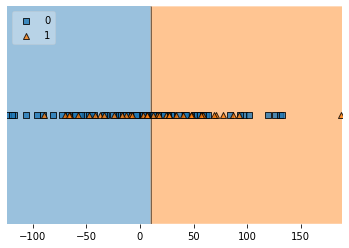

In [82]:
plot_clf(x_test, y_test, logreg)

In [204]:
df_report = df_report.append(report(linear_model.LogisticRegression(max_iter=100, penalty='l2'), X_train, Y_train, x_test, y_test, name=model_combination, cv=CV_splits, dict_scoring=score_metrics))

NameError: name 'df_report' is not defined

In [284]:
df_report

Model fit_time_cv1 fit_time_cv2 fit_time_cv3 fit_time_cv4  \
0      TFIDF_SMOTE_NB     0.006982      0.00798     0.007981     0.006983   
0     TFIDF_SMOTE_SGD     0.073799     0.070808     0.065823     0.169543   
0  TFIDF_SMOTE_LOGREG     0.394945     0.371008     0.390956     0.211434   

  fit_time_cv5 fit_time_mean fit_time_std score_time_cv1 score_time_cv2  ...  \
0     0.010971      0.008179     0.001465       0.035908       0.091755  ...   
0     0.060837      0.088162     0.040929        0.02294       0.021943  ...   
0     0.303191      0.334307     0.069712       0.024933       0.030926  ...   

  prec_overall recall_overall f1-score_overall tp_overall tn_overall  \
0     0.811767       0.804071          0.80386        226        216   
0     0.739456       0.734097         0.732254        198        215   
0     0.806688       0.801527         0.801171        226        212   

  fp_overall fn_overall cohens_kappa_overall matthews_corrcoef_overall  \
0         33         25             0.706107                  0.709429   
0         30         38             0.601145                  0.604502   
0         31         26              0.70229                  0.704719   

  roc_auc_overall  
0        0.931084  
0        0.878084  
0        0.927454  

[3 rows x 113 columns]

In [69]:
kf, list_training_error, list_testing_error = get_train_test_error(logreg, np.concatenate((np.array(X_train.todense()), np.array(x_test.todense()))), np.concatenate((Y_train, y_test)))

10it [10:01, 60.15s/it]


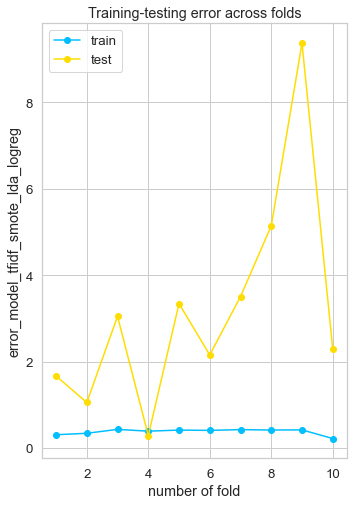

In [38]:
plot_train_test_error(kf, list_training_error, list_testing_error, 'error_model_tfidf_smote_lda_logreg')

In [373]:
Y_labeled = pd.DataFrame(np.ravel(y, order='C'), columns=['categoryId'])

Y_labeled = pd.DataFrame(data=np.transpose([Y_labeled['categoryId'],preprocessing.LabelEncoder().fit_transform(np.ravel(Y_labeled, order='C'))]), columns=["labels", "encoding"])
Y_labeled[['labels', 'encoding']].drop_duplicates().sort_values(by=['encoding'])

labels  encoding
170      645         0
4        648         1
85       650         2
0        655         3
3        656         4
60       677         5
30       678         6
705      679         7
7        692         8
21       775         9
2        784        10
1       1212        11
10      1266        12
304     2798        13
31      2803        14
236     3493        15
1462    9894        16

In [603]:
class_names = np.array(df_clean[['parentCategoryId', 'parentCategoryName']].drop_duplicates().sort_values(by=['parentCategoryId']))

In [623]:
class_names = label_encoder.classes_

In [796]:
class_names = np.array(pd.DataFrame(y_test).drop_duplicates())

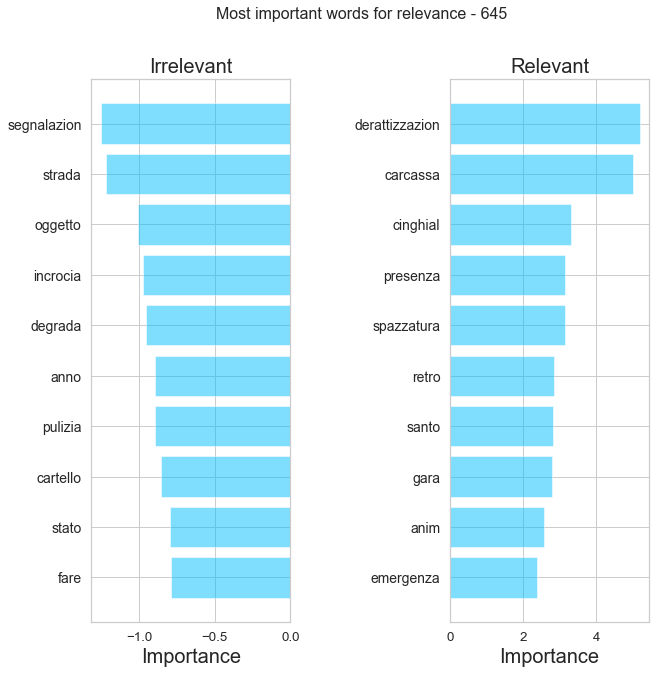

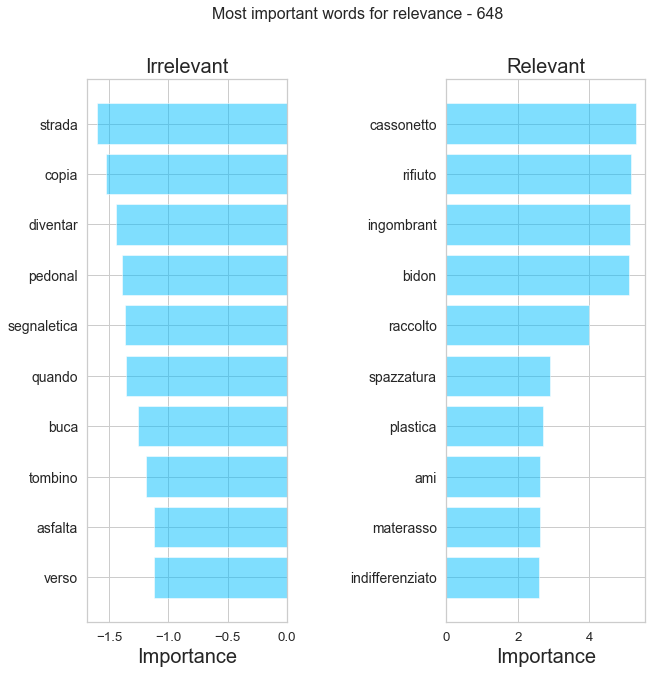

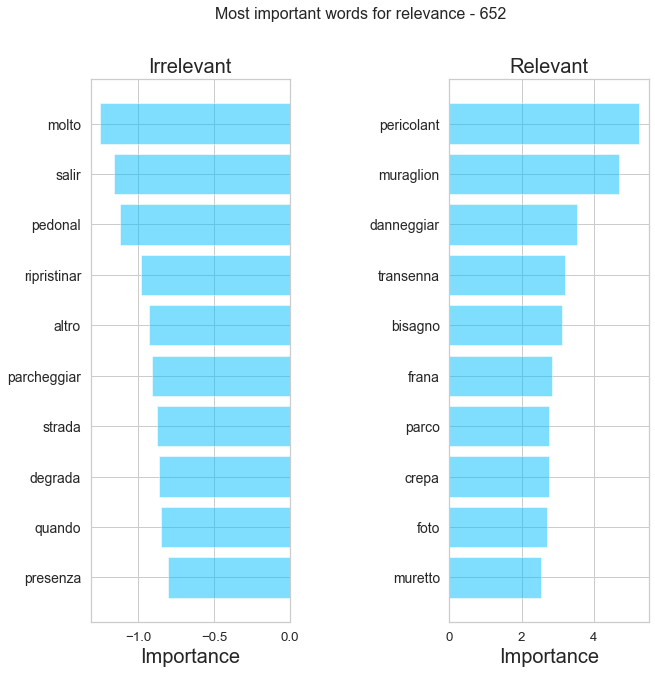

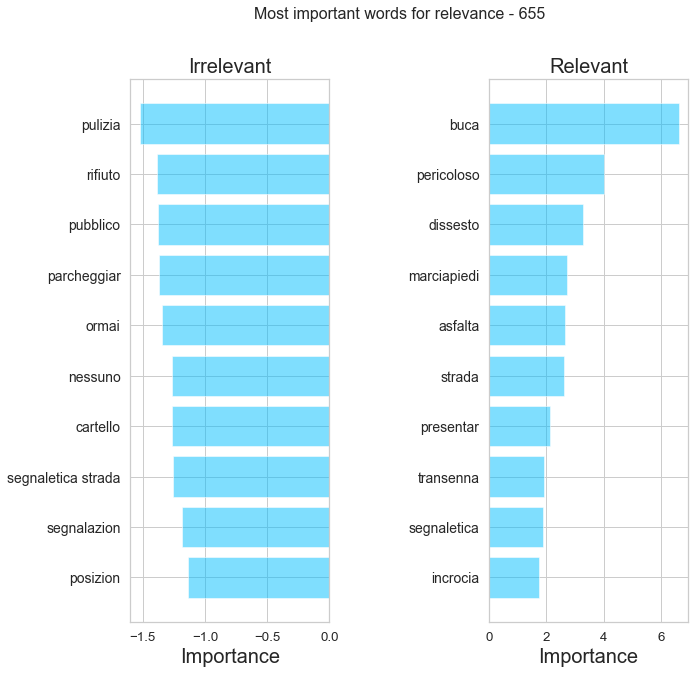

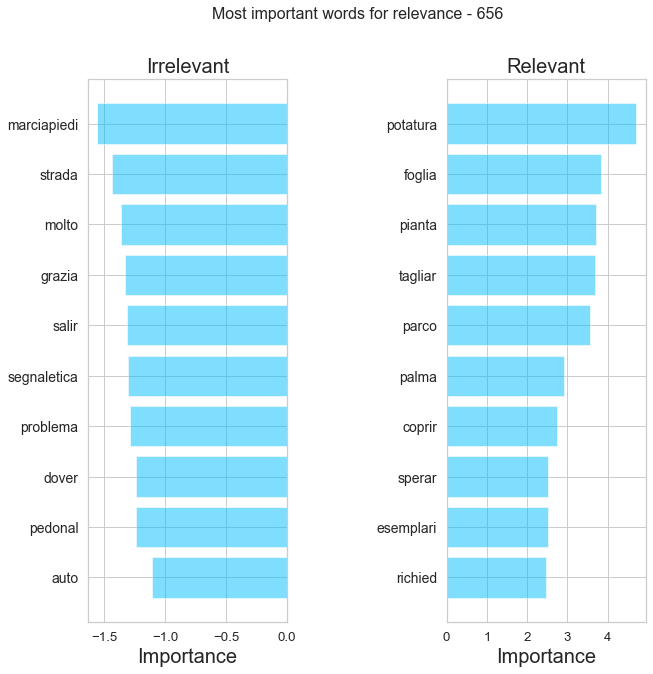

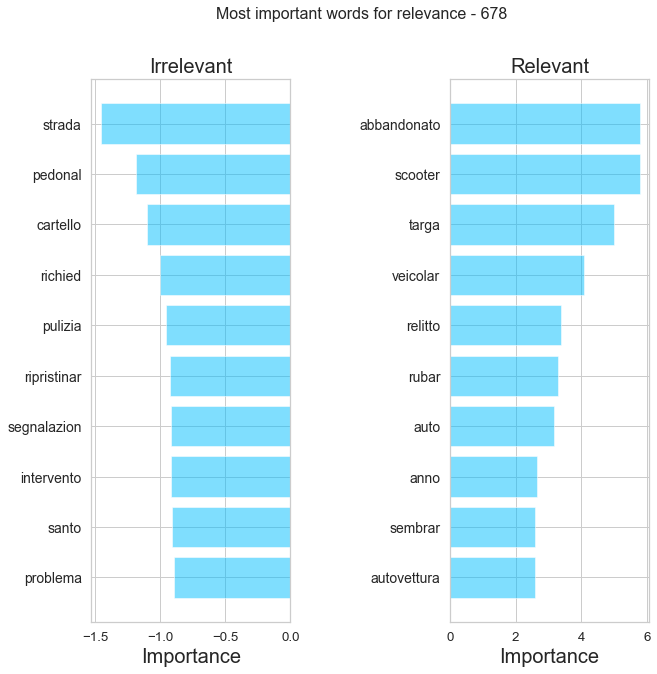

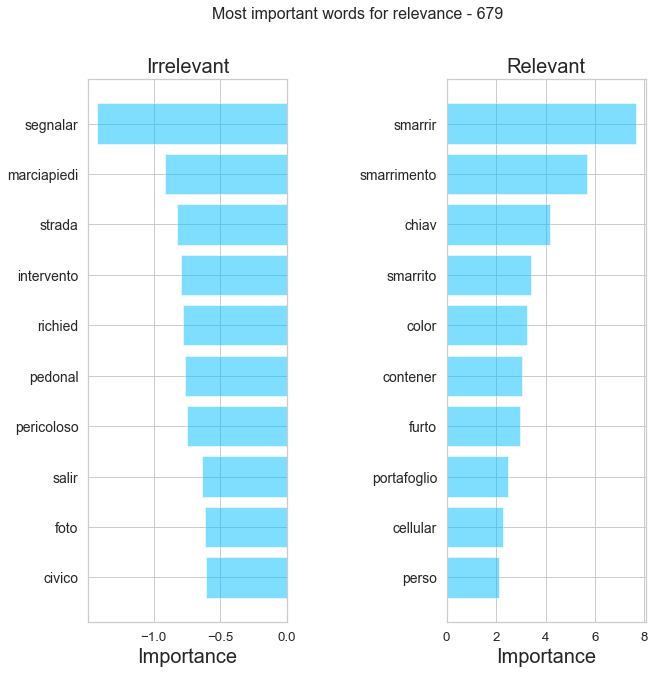

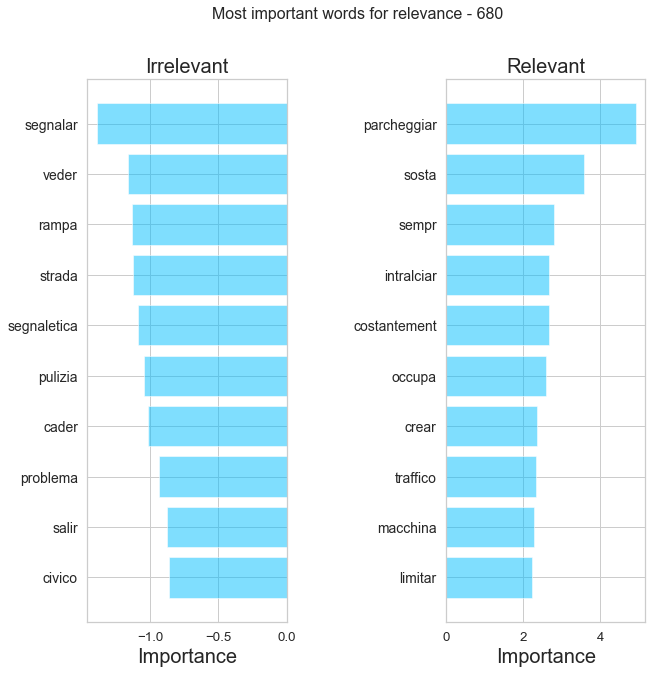

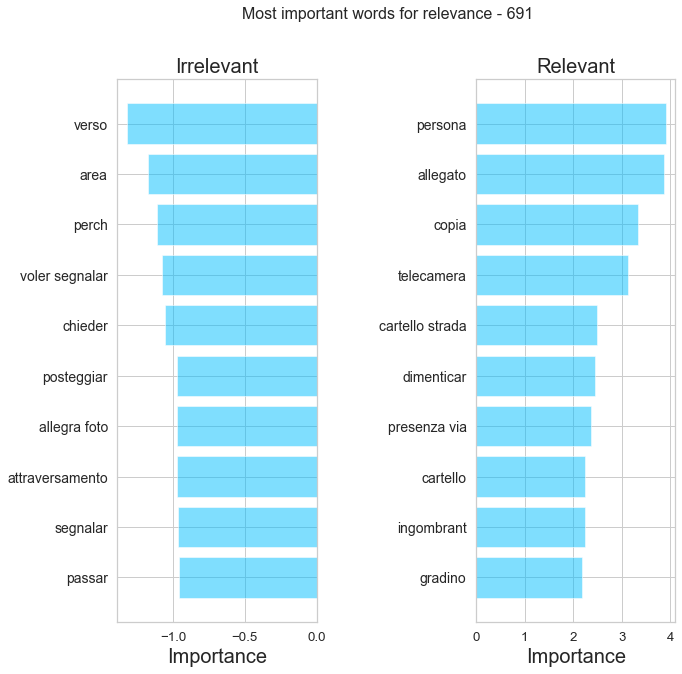

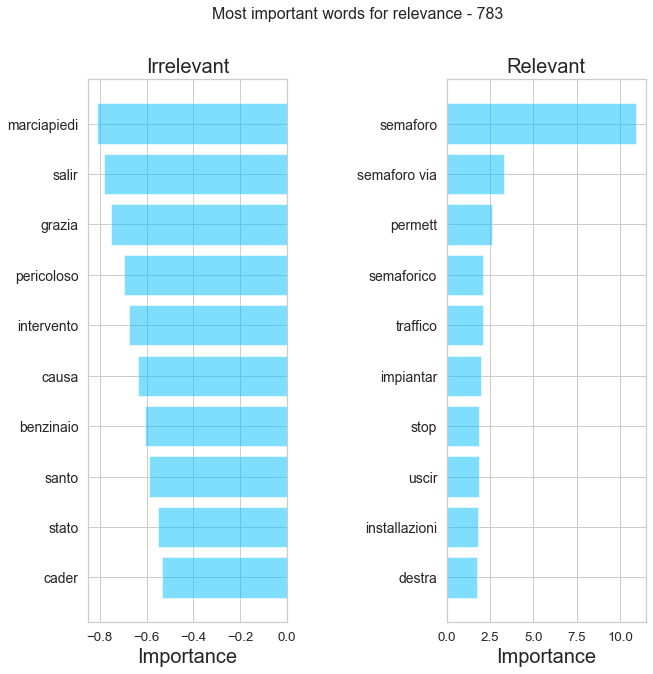

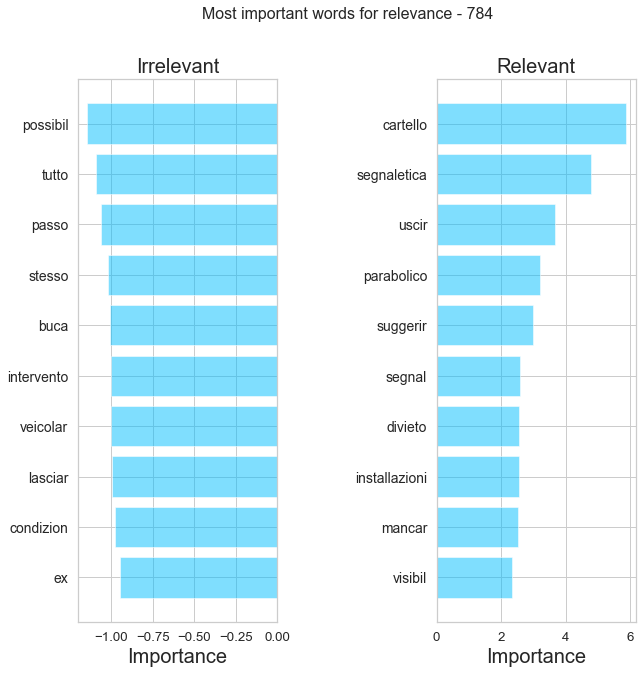

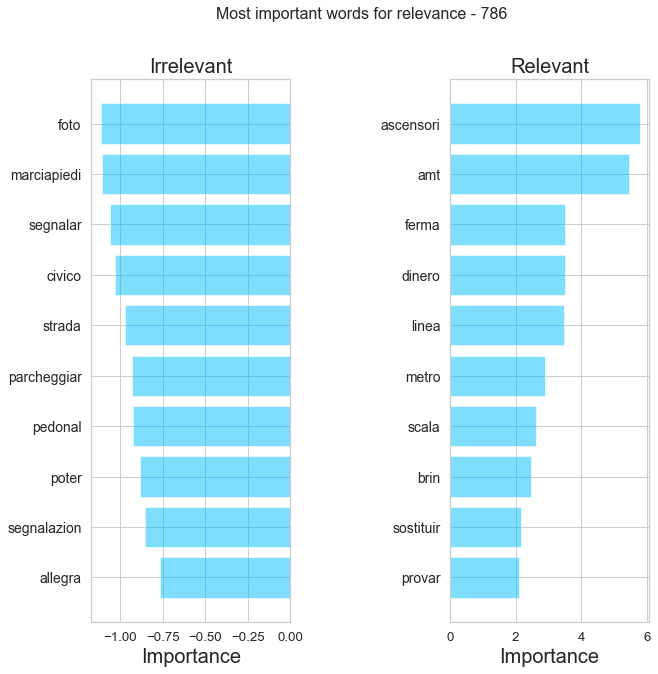

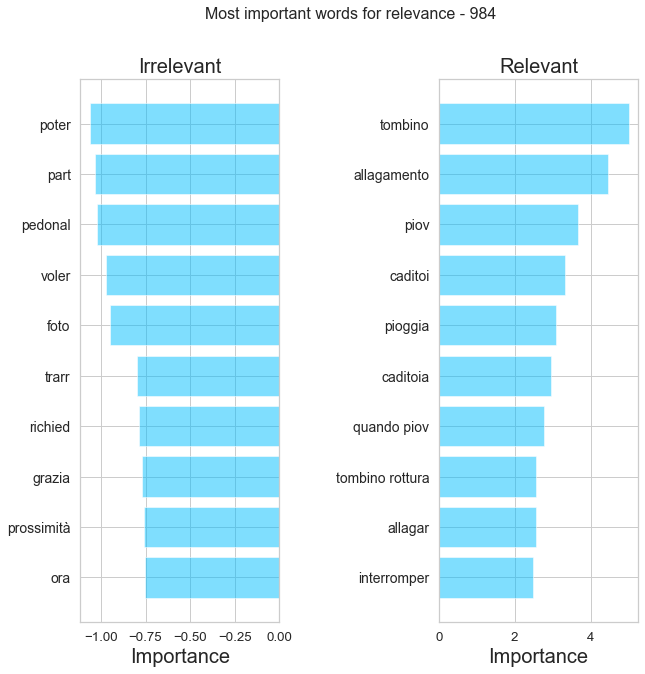

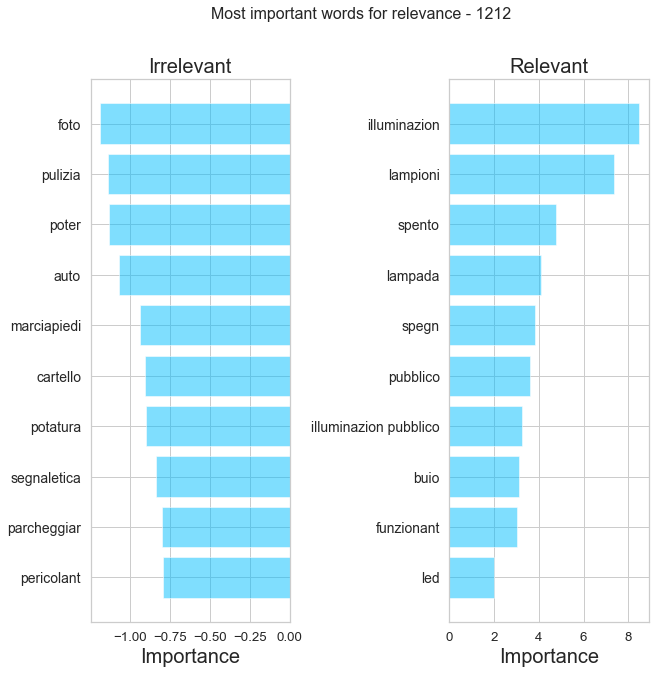

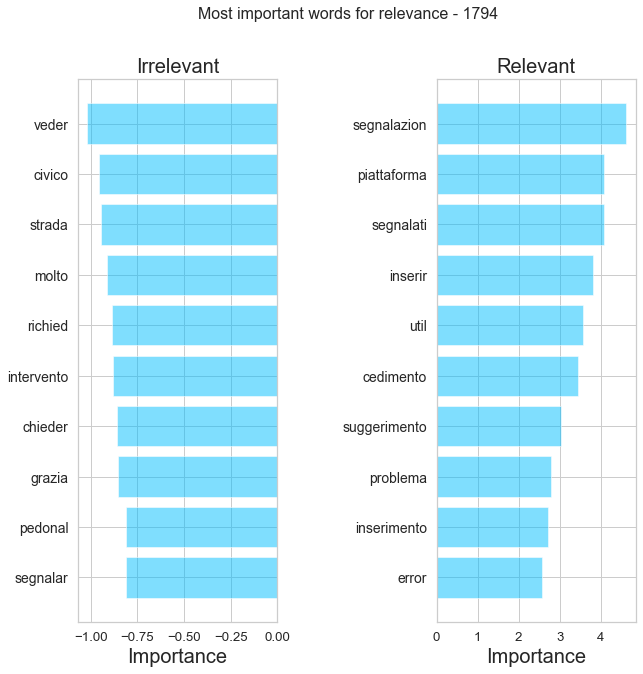

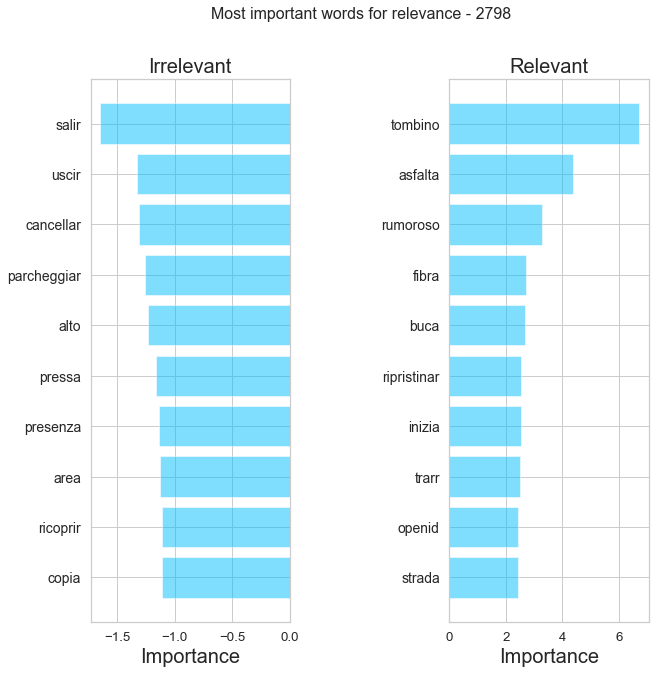

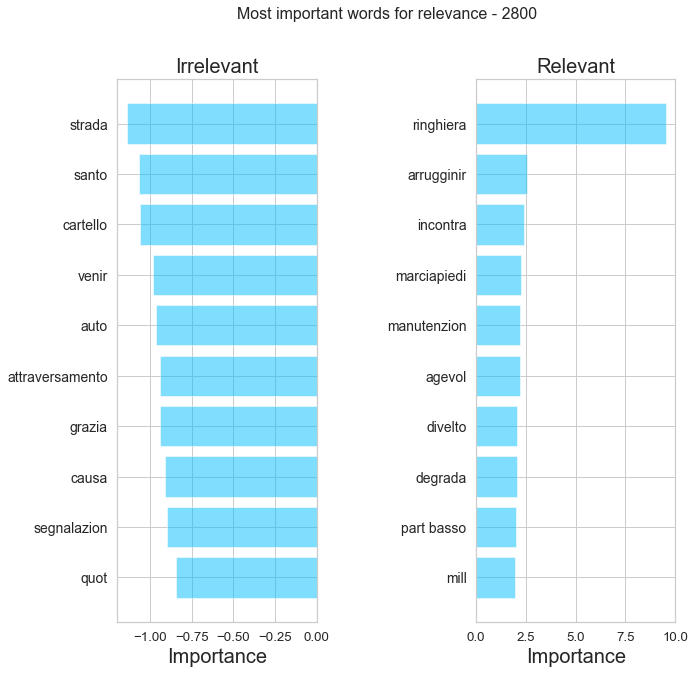

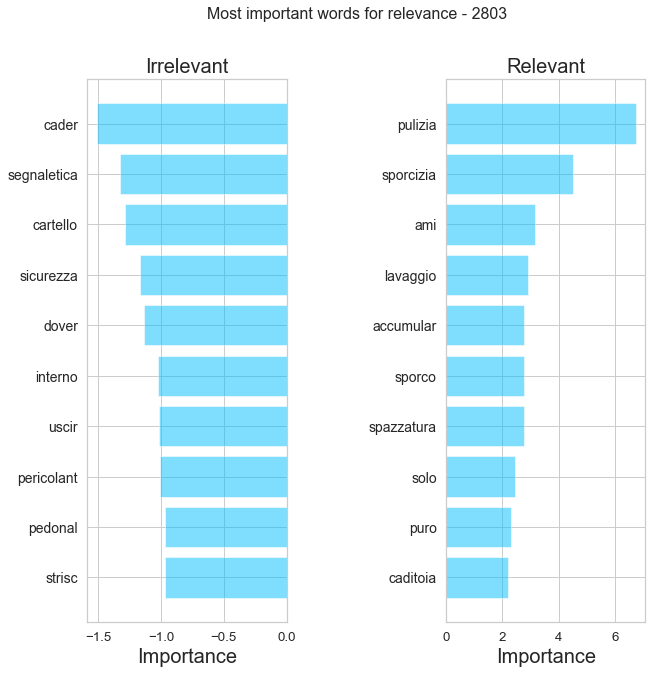

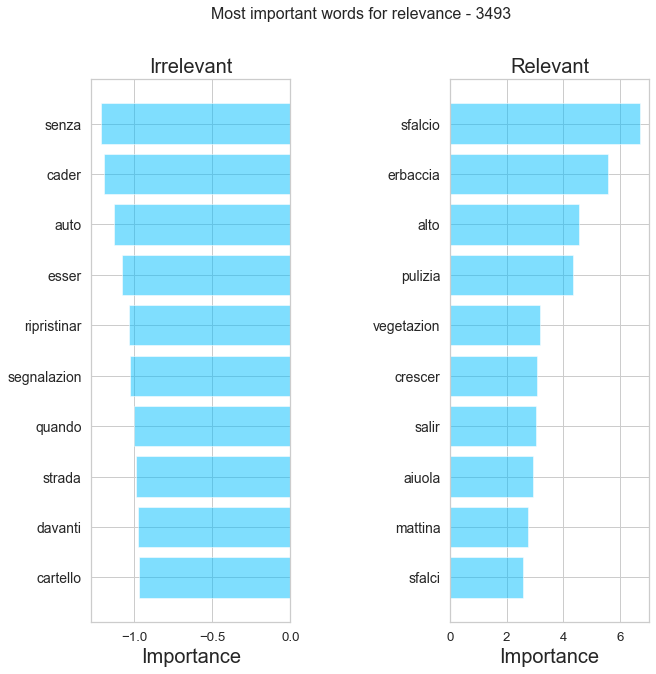

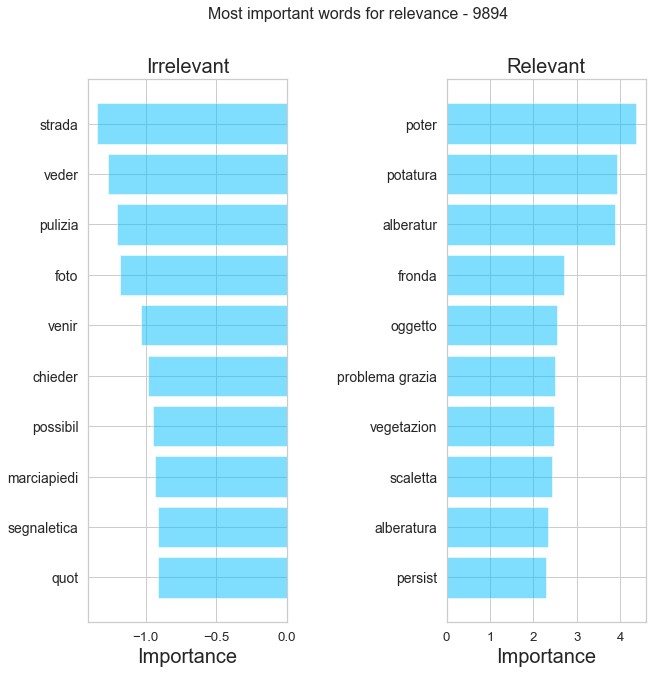

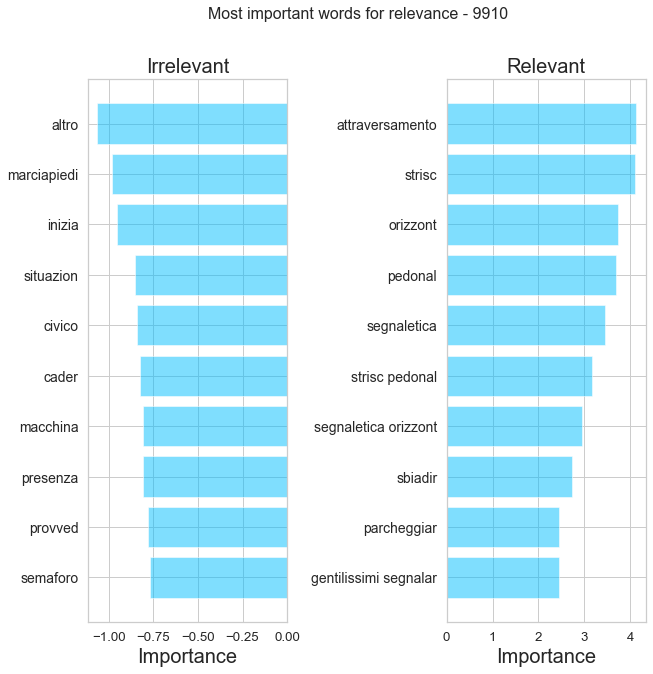

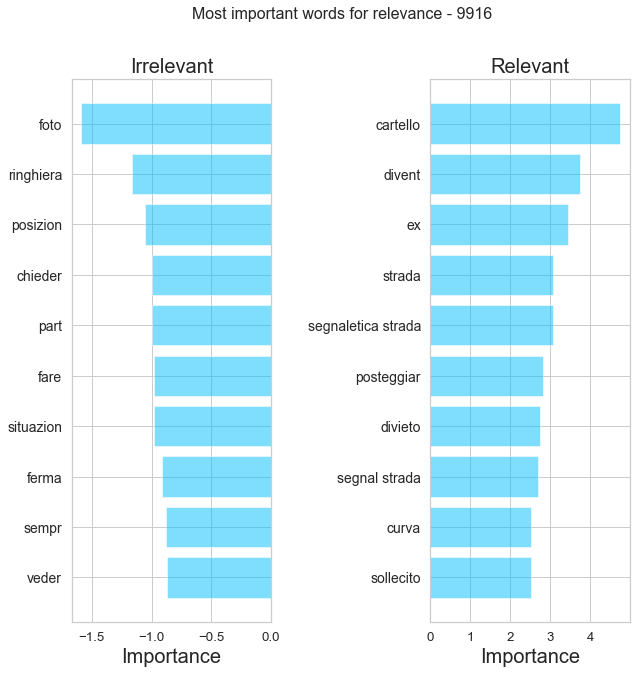

In [624]:
importance = get_most_important_features(tfidf_vectorizer, logreg, 10)
#class_names = np.array(df_clean[['parentCategoryId', 'parentCategoryName']].drop_duplicates().sort_values(by=['parentCategoryId']))
#class_names = np.array(df_clean[['categoryId']].drop_duplicates().sort_values(by=['categoryId']))
for i in range(len(class_names)):
    top_scores = [a[0] for a in importance[i]['tops']]
    top_words = [a[1] for a in importance[i]['tops']]
    bottom_scores = [a[0] for a in importance[i]['bottom']]
    bottom_words = [a[1] for a in importance[i]['bottom']]

    plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance - " + str(class_names[i]))

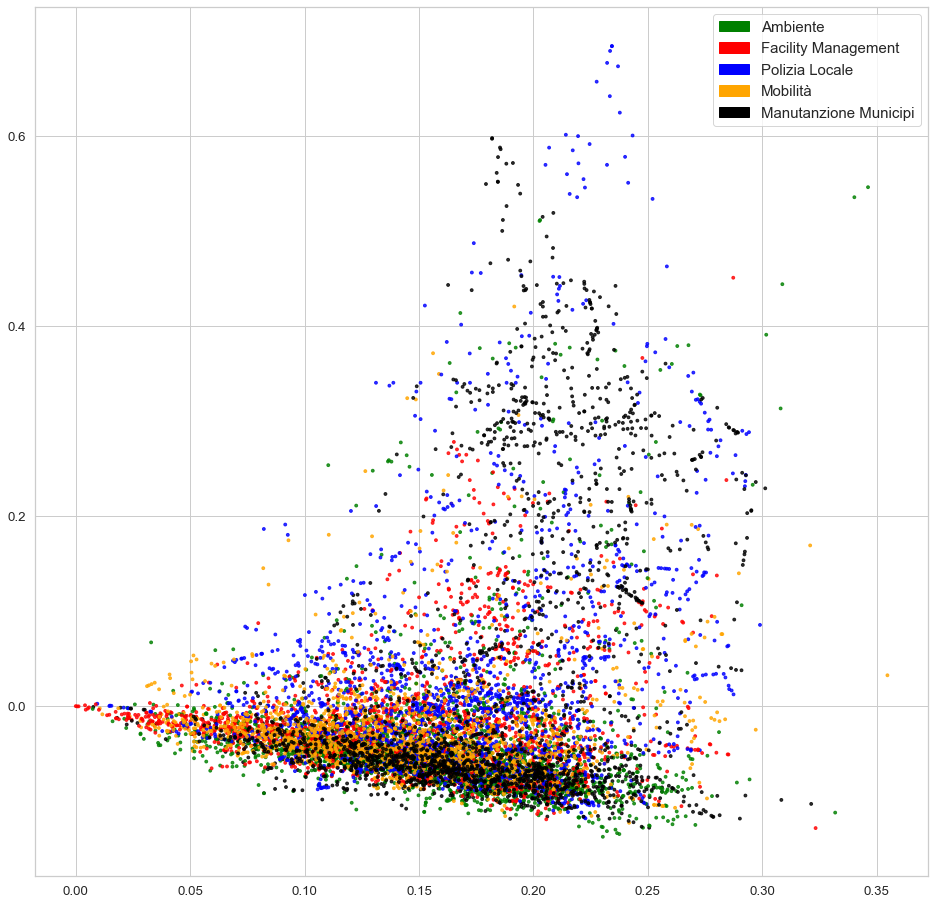

In [212]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train, Y_train)
plt.show()

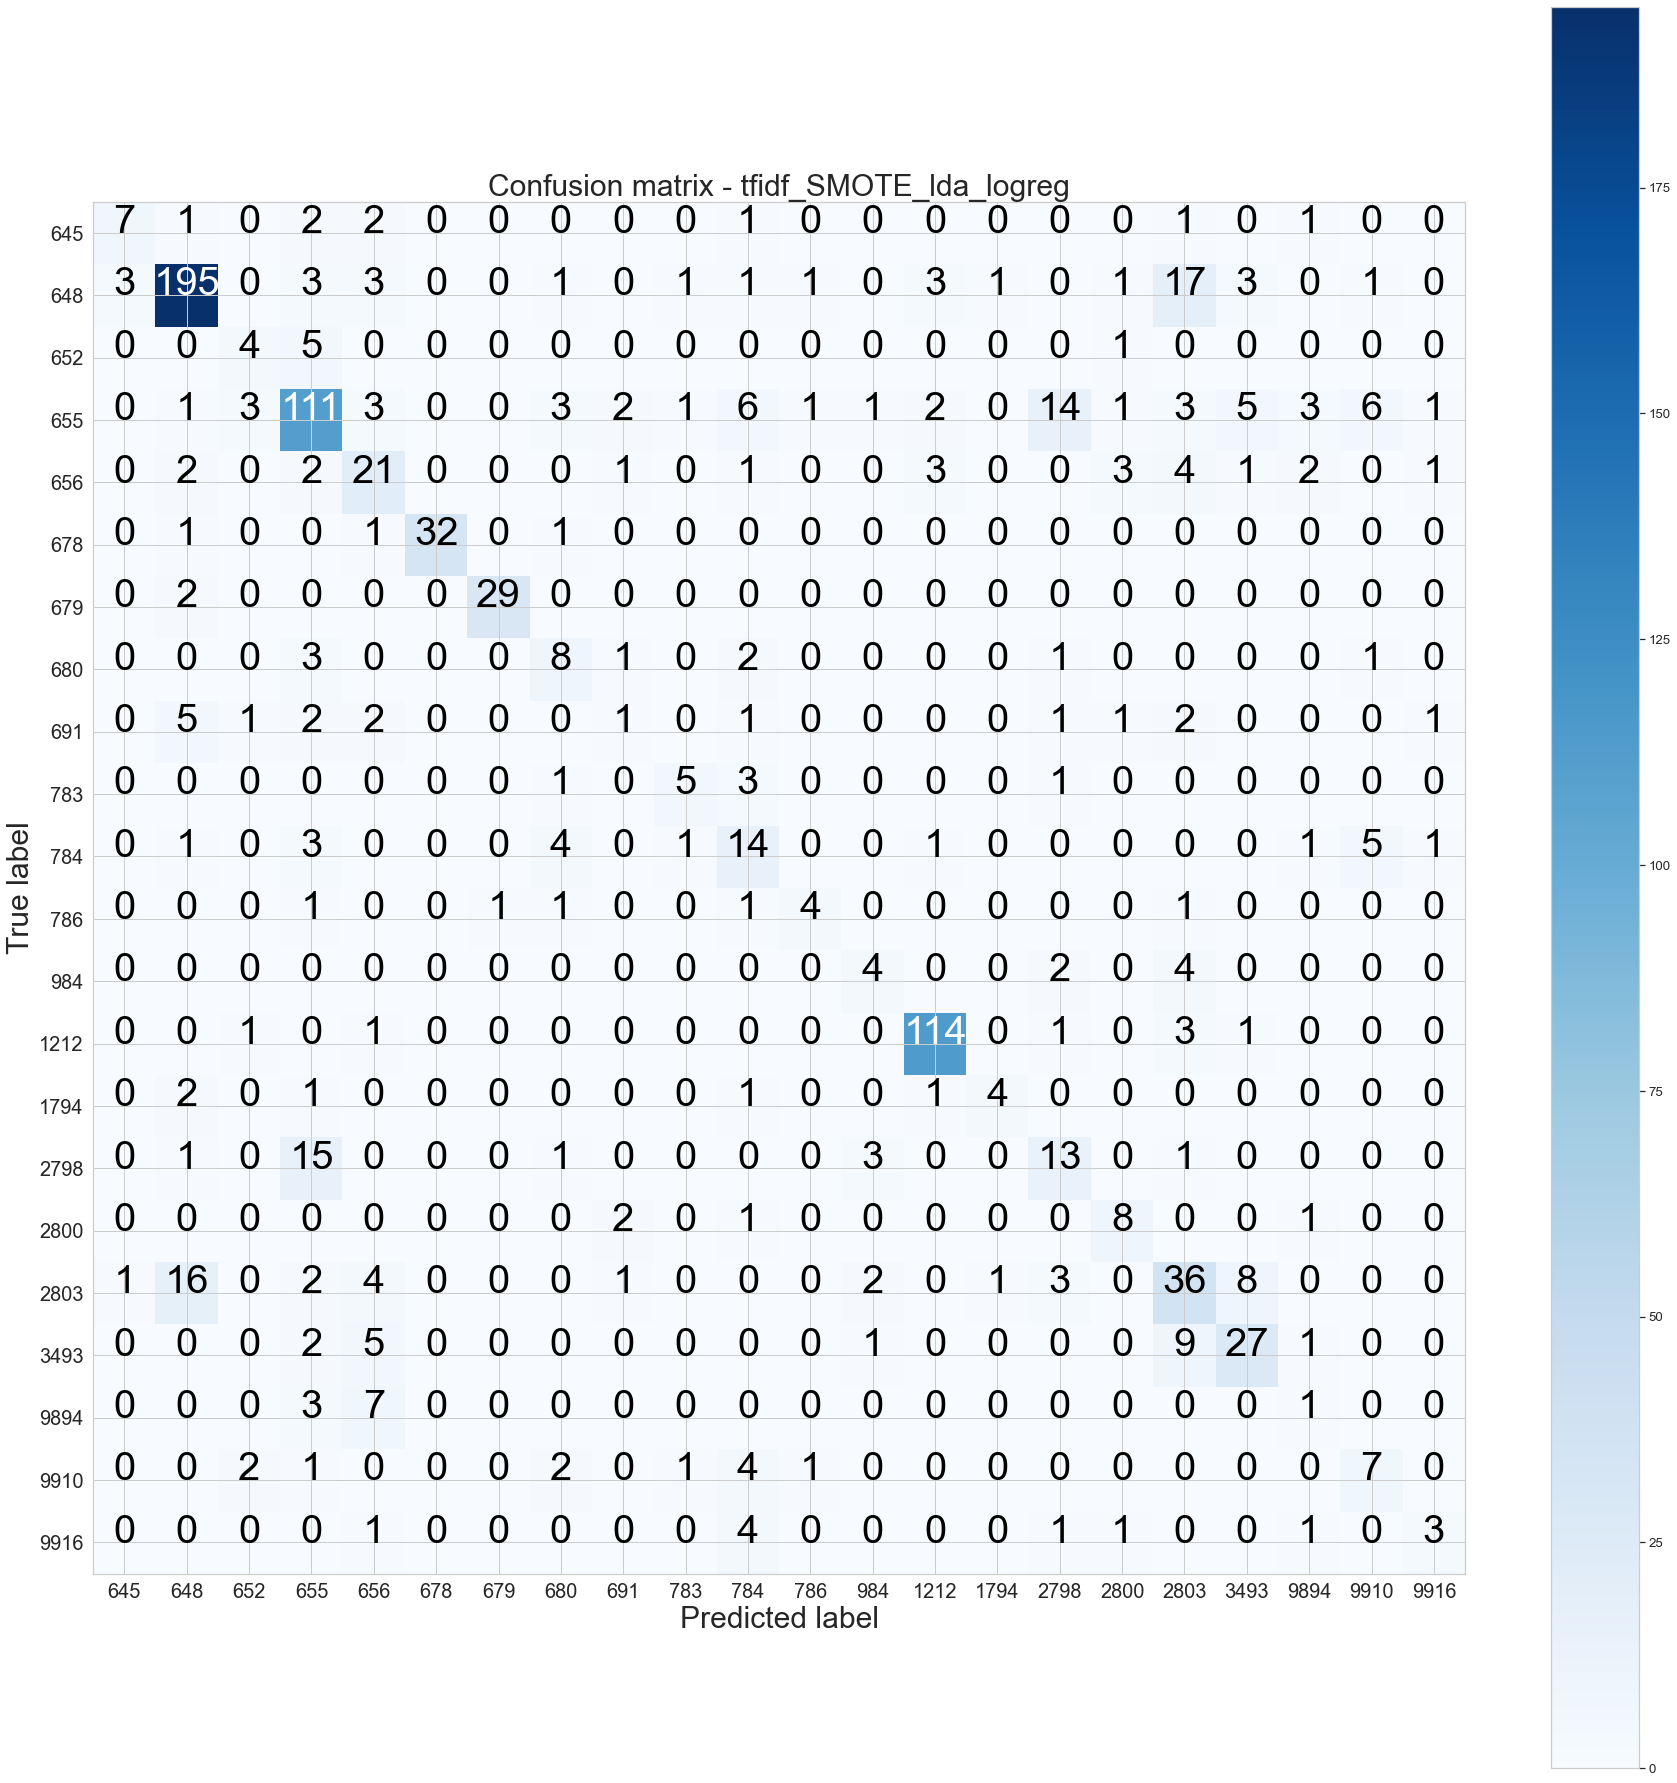

'print("TFIDF confusion matrix")\nprint(cm2)'

In [625]:
cm2 = confusion_matrix(y_test, pred_logreg)
fig = plt.figure(figsize=(25, 25))
plot = plot_confusion_matrix(cm2, classes=list(class_names[class_name] for class_name in range(len(class_names))), normalize=False, title='Confusion matrix - tfidf_SMOTE_lda_logreg')
plt.show()
'''print("TFIDF confusion matrix")
print(cm2)'''

In [494]:
print(cm2)

[[379  28  23   9   6  10   0]
 [ 27 239  31  33   5  20   0]
 [ 12  23 139  19   0   9   0]
 [  3  10  12  38   0   2   2]
 [  2   3   1   1   3   0   0]
 [  3  16   6   3   0   5   0]
 [  0   1   1   1   0   1   5]]


In [709]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [710]:
#DATA PREPARATION FOR DEEP LEARNING
# create a tokenizer 
token = Tokenizer(oov_token='<OOV>')
token.fit_on_texts(X_train.values.tolist())
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_train.values.tolist()), maxlen=128, padding='post', truncating='post')
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(x_test.values.tolist()), maxlen=128, padding='post', truncating='post')

labels = df_clean['categoryId'].unique()
test=pd.DataFrame(data=np.transpose([labels,preprocessing.LabelEncoder().fit_transform(labels)]), columns=["labels", "encoding"])
labels=test.encoding.tolist()

Y_train_labeled = pd.DataFrame(np.ravel(Y_train, order='C'), columns=['categoryId'])
y_test_labeled = pd.DataFrame(np.ravel(y_test, order='C'), columns=['categoryId'])

Y_train_labeled = pd.DataFrame(data=np.transpose([Y_train_labeled['categoryId'],preprocessing.LabelEncoder().fit_transform(np.ravel(Y_train_labeled, order='C'))]), columns=["labels", "encoding"])
y_test_labeled = pd.DataFrame(data=np.transpose([y_test_labeled['categoryId'],preprocessing.LabelEncoder().fit_transform(np.ravel(y_test, order='C'))]), columns=["labels", "encoding"])

In [711]:
train_seq_x = np.array(train_seq_x)
Y_train_labeled = np.array(Y_train_labeled['encoding'])
test_seq_x = np.array(test_seq_x)
y_test_labeled = np.array(y_test_labeled['encoding'])

In [712]:
for i in range(len(pd.DataFrame(Y_train_labeled).value_counts())):
    k_neighbors=int(np.sqrt(list(pd.DataFrame(Y_train_labeled).value_counts())[len(list(pd.DataFrame(Y_train_labeled).value_counts()))-1]))
    print(k_neighbors)
    smote = SMOTE(random_state=777, k_neighbors=k_neighbors, sampling_strategy='minority')
    #smote = SMOTE(random_state=777, k_neighbors=4)
    X_train, Y_train = smote.fit_resample(train_seq_x, Y_train_labeled)

11
11
11
11
11


In [734]:
opt = SGD(learning_rate=0.001)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 16, input_length=128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(len(labels), activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [722]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = dict(enumerate(compute_class_weight('balanced', np.unique(Y_train_labeled), Y_train_labeled).flatten(), 0))
class_weights

C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4], y=[0 2 0 ... 1 2 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{0: 0.5263427109974425,
 1: 0.5669421487603306,
 2: 1.1827586206896552,
 3: 3.7418181818181817,
 4: 4.473913043478261}

In [735]:
from sklearn.utils.class_weight import compute_class_weight

num_epochs = 30
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(test_seq_x, y_test_labeled), verbose=2)

Epoch 1/30
129/129 - 4s - loss: 10.0594 - accuracy: 0.1385 - val_loss: 7.9941 - val_accuracy: 0.1697
Epoch 2/30
129/129 - 1s - loss: 10.0956 - accuracy: 0.1266 - val_loss: 7.9789 - val_accuracy: 0.1697
Epoch 3/30
129/129 - 1s - loss: 10.0916 - accuracy: 0.1266 - val_loss: 7.9717 - val_accuracy: 0.1697
Epoch 4/30
129/129 - 1s - loss: 10.0897 - accuracy: 0.1266 - val_loss: 7.9670 - val_accuracy: 0.1697
Epoch 5/30
129/129 - 1s - loss: 10.0888 - accuracy: 0.1266 - val_loss: 7.9637 - val_accuracy: 0.1697
Epoch 6/30
129/129 - 1s - loss: 10.0883 - accuracy: 0.1266 - val_loss: 7.9615 - val_accuracy: 0.1697
Epoch 7/30
129/129 - 1s - loss: 10.0879 - accuracy: 0.1266 - val_loss: 7.9592 - val_accuracy: 0.1697
Epoch 8/30
129/129 - 1s - loss: 10.0877 - accuracy: 0.1266 - val_loss: 7.9581 - val_accuracy: 0.1697
Epoch 9/30
129/129 - 1s - loss: 10.0876 - accuracy: 0.1266 - val_loss: 7.9568 - val_accuracy: 0.1697
Epoch 10/30
129/129 - 1s - loss: 10.0876 - accuracy: 0.1266 - val_loss: 7.9556 - val_accura

In [724]:
pred_nn = model.predict(test_seq_x)
report = classification_report(y_test_labeled, np.argmax(pred_nn, axis=-1), output_dict=True)

C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: Unde

In [725]:
print(pd.DataFrame(report).transpose())

              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  293.000000
1              0.000000  0.000000  0.000000  272.000000
2              0.000000  0.000000  0.000000  131.000000
3              0.053109  1.000000  0.100861   41.000000
4              0.000000  0.000000  0.000000   35.000000
accuracy       0.053109  0.053109  0.053109    0.053109
macro avg      0.010622  0.200000  0.020172  772.000000
weighted avg   0.002821  0.053109  0.005357  772.000000


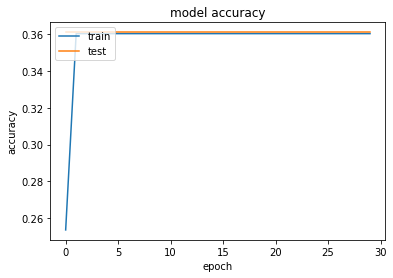

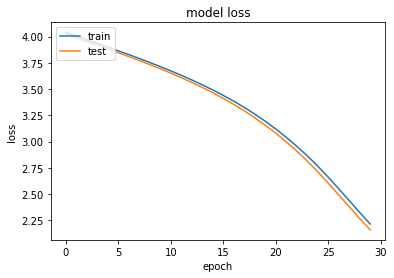

In [332]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
def deep_neural_networks(word_index, label=labels, pre_trained=False):
    '''
    Function to generate a deep neural network for binary or multiclass classification.
    @param word_index: (matrix) unique token in corpus
    @param label: (list) list of labels to determine if it,s a binary or multiclass
    @param embedding_matrix: (matrix) matrix of integer for each word in the 
    @param pre_trained: (bool) determine if the model will use pretrained model
    @return: (model) deep neural network 
    '''
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 16, input_length=200)
    else:
        print("Pre-trained model used")
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
        embedded,
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation="relu"),#tf.nn.swish),
        keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")
    ])

    #print(model.summary())

    return model

In [17]:
df_report = pd.DataFrame()

In [23]:
df_report = df_report.append(cross_validate_NN(deep_neural_networks(word_index, label=labels, pre_trained=False), 
                                                     train_seq_x, Y_train_labeled, test_seq_x, y_test_labeled,  name="Deep_NN_WE",scoring=score_metrics, 
                                                     n_splits=CV_splits))

k-fold : 1
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Precision: 3.969% , Recall:         4.738%, Time 	 179.0524 ms
k-fold : 2
C:\Users\mousl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\

In [155]:
df_report

Model fit_time_cv1 fit_time_cv2 fit_time_cv3 fit_time_cv4  \
0  BOW_ROS_SGD     0.064824      0.12666     0.097739     0.054853   

  fit_time_cv5 fit_time_mean fit_time_std score_time_cv1 score_time_cv2  ...  \
0     0.057843      0.080383      0.02773       0.071807       0.072806  ...   

  prec_overall recall_overall f1-score_overall tp_overall tn_overall  \
0     0.947583       0.947126         0.946763        129        144   

  fp_overall fn_overall cohens_kappa_overall matthews_corrcoef_overall  \
0          5         10             0.920648                  0.921204   

  roc_auc_overall  
0        0.976166  

[1 rows x 113 columns]

In [158]:
w_to_excel('categoryFrequencies.xlsx', df_report, 'summary')